In [3]:
! pip install psutil
import psutil

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file1 = drive.CreateFile({'id':'1gwaCcjBjajjkelS0EUSVM8uz6YCLowag'}) 
file1.GetContentFile('PropensityModelInput.csv')

In [0]:
import csv
import pandas as pd

In [0]:
dataset=pd.read_csv('PropensityModelInput.csv',encoding='latin-1')

In [16]:
dataset.head(5)

b_resnumber  b_CONTACTID  Repeat_flag  Tenure_Months  \
0        45489      2622933            0      22.233333   
1        45490      2564425            0      22.233333   
2        45497      2583856            0      22.233333   
3        45498      4651013            0      22.233333   
4        45499      3229831            0      22.233333   

   Frequency of travel till july  last booking month  Time since last booking  \
0                              1                   1                      575   
1                              1                   1                      575   
2                              1                   1                      575   
3                              1                   1                      575   
4                              4                   1                      200   

   Age_derived  NOPAX   AGE       ...        MRKCONTACTS_BROADCAST  \
0         46.0      1  46.0       ...                            Y   
1         42.0      1  42.0       ...                            Y   
2         45.0      1  43.0       ...                            Y   
3         40.0      2  39.0       ...                            Y   
4         67.0      2  67.0       ...                            Y   

   MAILBROADCAST  CONTACTTYPE  c_STATUS a_COUNTRY Birthdate agebucket  \
0              Y       DIRECT         A        GB     26549    Age<50   
1              Y       DIRECT         A        GB     28047    Age<50   
2              Y       DIRECT         A        GB     26864    Age<50   
3              Y       DIRECT         A        GB     28601    Age<50   
4              Y       DIRECT         A        GB     18887    Age>65   

            Pax                  GB_cluster  Reference date  
0          Solo                Mid Age Solo           43404  
1          Solo                Mid Age Solo           43404  
2          Solo                Mid Age Solo           43404  
3  Small Family  Young Honeymooners, family           43404  
4  Small Family  Senior Companion Traveller           43404  

[5 rows x 48 columns]

# MOUNTING GOOGLE DRIVE- VVI
### This  will help to use google drive as local drive

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
propensity_model=pd.read_csv('gdrive/My Drive/Travelopia pannel/PropensityModelInput.csv',encoding='latin-1')

In [7]:
propensity_model.head(3)

b_resnumber  b_CONTACTID  Repeat_flag  Tenure_Months  \
0        45489      2622933            0      22.233333   
1        45490      2564425            0      22.233333   
2        45497      2583856            0      22.233333   

   Frequency of travel till july  last booking month  Time since last booking  \
0                              1                   1                      575   
1                              1                   1                      575   
2                              1                   1                      575   

   Age_derived  NOPAX   AGE       ...        MRKCONTACTS_BROADCAST  \
0         46.0      1  46.0       ...                            Y   
1         42.0      1  42.0       ...                            Y   
2         45.0      1  43.0       ...                            Y   

   MAILBROADCAST  CONTACTTYPE  c_STATUS a_COUNTRY Birthdate agebucket   Pax  \
0              Y       DIRECT         A        GB     26549    Age<50  Solo   
1              Y       DIRECT         A        GB     28047    Age<50  Solo   
2              Y       DIRECT         A        GB     26864    Age<50  Solo   

     GB_cluster  Reference date  
0  Mid Age Solo           43404  
1  Mid Age Solo           43404  
2  Mid Age Solo           43404  

[3 rows x 48 columns]

In [0]:
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
import sys

In [8]:
# Check data type of the columns
propensity_model.dtypes

b_resnumber                        int64
b_CONTACTID                        int64
Repeat_flag                        int64
Tenure_Months                    float64
Frequency of travel till july      int64
last booking month                 int64
Time since last booking            int64
Age_derived                      float64
NOPAX                              int64
AGE                              float64
Days_advance_booking               int64
DEPOSITAMOUNT                    float64
REVENUE                          float64
NUMDAYS                          float64
COMPANYID                         object
BRANDID                           object
ARKETCODE                         object
RESPRODUCTCODE                    object
SELLMETHOD                        object
b_CUSTOMERTYPE                   float64
RESSTATUS                         object
CORRESPONDENCETYPE                object
DEPDATE                            int64
Dep_Month                          int64
BOOKDATE        

In [0]:
#replacing blanck space in columns with _      .... lambda function is to apply it all mped function.... use apply with one axis 
cols = propensity_model.columns
cols = cols.map(lambda x: x.replace(' ', '_') ) # replacing space in the colnames with _
cols = cols.map(lambda x: x.replace('-', '_')) # replacing - with _
cols = cols.map(lambda x: x.replace(' ', '')) # replacing blank space with no gap
propensity_model.columns = cols

In [10]:
propensity_model.dtypes

b_resnumber                        int64
b_CONTACTID                        int64
Repeat_flag                        int64
Tenure_Months                    float64
Frequency_of_travel_till_july      int64
last_booking_month                 int64
Time_since_last_booking            int64
Age_derived                      float64
NOPAX                              int64
AGE                              float64
Days_advance_booking               int64
DEPOSITAMOUNT                    float64
REVENUE                          float64
NUMDAYS                          float64
COMPANYID                         object
BRANDID                           object
ARKETCODE                         object
RESPRODUCTCODE                    object
SELLMETHOD                        object
b_CUSTOMERTYPE                   float64
RESSTATUS                         object
CORRESPONDENCETYPE                object
DEPDATE                            int64
Dep_Month                          int64
BOOKDATE        

In [0]:
# Select only specific columns
propensity = propensity_model[['b_CONTACTID','b_resnumber',
              'Repeat_flag','Tenure_Months','Frequency_of_travel_till_july','last_booking_month','Time_since_last_booking','Age_derived',
              'NOPAX','Days_advance_booking','REVENUE','NUMDAYS','SHAREOK','LANDONLYOK',
              'AIRINCLUDED','GENDER']]

In [11]:
propensity.tail(3)

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
34316      5413343     10130009            0       3.133333   
34317      5413457     10130029            0       3.100000   
34318      5413467     10130050            0       3.100000   

       Frequency_of_travel_till_july  last_booking_month  \
34316                              1                   7   
34317                              1                   7   
34318                              1                   7   

       Time_since_last_booking  Age_derived  NOPAX  Days_advance_booking  \
34316                        2         25.0      1                    71   
34317                        1         30.0      2                    81   
34318                        1         34.0      1                    83   

          REVENUE  NUMDAYS SHAREOK LANDONLYOK AIRINCLUDED GENDER  
34316  2237.25969      7.0      AA          Y           N      F  
34317   914.62000     13.0      AA          Y           N      F  
34318  1319.21650      7.0      AA          Y           N      F

In [0]:
kp= pd.get_dummies(propensity['GENDER'],prefix='GENDER_') 
# if you put an argument drop_first= True then it will drop one of the dummy variable to avoid dummy trap
# prefixt helps to put a string before the 

In [0]:
propensity = pd.concat([propensity, kp], axis=1)      
#propensity.drop(['GENDER', ], inplace=True, axis=1)

In [12]:
propensity.head(3)

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
0      2622933        45489            0      22.233333   
1      2564425        45490            0      22.233333   
2      2583856        45497            0      22.233333   

   Frequency_of_travel_till_july  last_booking_month  Time_since_last_booking  \
0                              1                   1                      575   
1                              1                   1                      575   
2                              1                   1                      575   

   Age_derived  NOPAX  Days_advance_booking  REVENUE  NUMDAYS SHAREOK  \
0         46.0      1                   215  3686.55     15.0      AA   
1         42.0      1                   278  2226.05     15.0      AA   
2         45.0      1                    27  1269.00     14.0      AA   

  LANDONLYOK AIRINCLUDED GENDER  GENDER__F  GENDER__M  
0          Y           Y      F          1          0  
1          Y           Y      F          1          0  
2          Y           Y      F          1          0

In [0]:
# Creating a new variable or feature engineering

propensity['rate_per_person']=(propensity['REVENUE'] +1) / ( propensity['NUMDAYS'] * propensity['NOPAX'] +1)

In [22]:
propensity.head(3)

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
0      2622933        45489            0      22.233333   
1      2564425        45490            0      22.233333   
2      2583856        45497            0      22.233333   

   Frequency_of_travel_till_july  last_booking_month  Time_since_last_booking  \
0                              1                   1                      575   
1                              1                   1                      575   
2                              1                   1                      575   

   Age_derived  NOPAX  Days_advance_booking  REVENUE  NUMDAYS SHAREOK  \
0         46.0      1                   215  3686.55     15.0      AA   
1         42.0      1                   278  2226.05     15.0      AA   
2         45.0      1                    27  1269.00     14.0      AA   

  LANDONLYOK AIRINCLUDED GENDER  GENDER__F  GENDER__M  rate_per_person  
0          Y           Y      F          1          0       230.471875  
1          Y           Y      F          1          0       139.190625  
2          Y           Y      F          1          0        84.666667

In [20]:
# Creating pivot table in Python

pd.pivot_table(propensity, index=['Repeat_flag'], aggfunc='mean')  # use aggefunc 'count' to get frequency count

#np.amax
#np.argmax # gives index of the max
#np.std

Age_derived  Days_advance_booking  Frequency_of_travel_till_july  \
Repeat_flag                                                                     
0              54.724429            134.625048                       1.656982   
1              55.301829             98.625000                       2.557927   

             GENDER__F  GENDER__M     NOPAX    NUMDAYS      REVENUE  \
Repeat_flag                                                           
0             0.568725   0.427918  1.568131  10.074518  3004.951266   
1             0.500000   0.500000  1.315549   9.157975  2141.610229   

             Tenure_Months  Time_since_last_booking   b_CONTACTID  \
Repeat_flag                                                         
0                13.735865               272.198883  4.189450e+06   
1                14.015650               238.242378  3.699411e+06   

               b_resnumber  last_booking_month  rate_per_person  
Repeat_flag                                                      
0            109905.635386            5.041173              inf  
1             94584.859756            5.640244              inf

In [23]:
# Just like summary in R
propensity.describe(include = 'all')

b_CONTACTID   b_resnumber   Repeat_flag  Tenure_Months  \
count   3.431900e+04  3.431900e+04  34319.000000   34319.000000   
unique           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN            NaN   
mean    4.180083e+06  1.096128e+05      0.019115      13.741213   
std     1.315284e+06  5.419726e+05      0.136930       5.494377   
min     2.065579e+06  4.548900e+04      0.000000       3.066667   
25%     2.576717e+06  6.186350e+04      0.000000       9.066667   
50%     5.139532e+06  7.940800e+04      0.000000      13.700000   
75%     5.263730e+06  9.807200e+04      0.000000      18.933333   
max     5.423276e+06  1.013005e+07      1.000000      22.233333   

        Frequency_of_travel_till_july  last_booking_month  \
count                    34319.000000        34319.000000   
unique                            NaN                 NaN   
top                               NaN                 NaN   
freq                              NaN                 NaN   
mean                         1.674204            5.052624   
std                          1.348982            3.360652   
min                          1.000000            1.000000   
25%                          1.000000            2.000000   
50%                          1.000000            4.000000   
75%                          2.000000            7.000000   
max                         21.000000           12.000000   

        Time_since_last_booking   Age_derived         NOPAX  \
count              34319.000000  34288.000000  34319.000000   
unique                      NaN           NaN           NaN   
top                         NaN           NaN           NaN   
freq                        NaN           NaN           NaN   
mean                 271.549812     54.735476      1.563303   
std                  162.225959     13.256287      0.767671   
min                    0.000000     19.000000      0.000000   
25%                  143.000000     47.000000      1.000000   
50%                  242.000000     57.000000      1.000000   
75%                  407.000000     64.000000      2.000000   
max                  575.000000     90.000000     17.000000   

        Days_advance_booking       REVENUE       NUMDAYS SHAREOK LANDONLYOK  \
count           34319.000000  34319.000000  34268.000000   34268      34268   
unique                   NaN           NaN           NaN      25          2   
top                      NaN           NaN           NaN      AA          Y   
freq                     NaN           NaN           NaN   27221      34253   
mean              133.936915   2988.448696     10.057079     NaN        NaN   
std                87.576984   2678.551041      3.981566     NaN        NaN   
min              -218.000000      0.000000      0.000000     NaN        NaN   
25%                67.000000   1388.075000      8.000000     NaN        NaN   
50%               119.000000   2339.100000      8.000000     NaN        NaN   
75%               188.000000   3631.940000     14.000000     NaN        NaN   
max               649.000000  52970.240500     41.000000     NaN        NaN   

       AIRINCLUDED GENDER     GENDER__F     GENDER__M  rate_per_person  
count        34268  34206  34319.000000  34319.000000     34268.000000  
unique           2      2           NaN           NaN              NaN  
top              Y      F           NaN           NaN              NaN  
freq         31545  19473           NaN           NaN              NaN  
mean           NaN    NaN      0.567412      0.429296       180.563869  
std            NaN    NaN      0.495442      0.494983       124.537096  
min            NaN    NaN      0.000000      0.000000         0.009174  
25%            NaN    NaN      0.000000      0.000000       123.710187  
50%            NaN    NaN      1.000000      0.000000       151.000000  
75%            NaN    NaN      1.00

In [22]:
propensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34319 entries, 0 to 34318
Data columns (total 18 columns):
b_CONTACTID                      34319 non-null int64
b_resnumber                      34319 non-null int64
Repeat_flag                      34319 non-null int64
Tenure_Months                    34319 non-null float64
Frequency_of_travel_till_july    34319 non-null int64
last_booking_month               34319 non-null int64
Time_since_last_booking          34319 non-null int64
Age_derived                      34288 non-null float64
NOPAX                            34319 non-null int64
Days_advance_booking             34319 non-null int64
REVENUE                          34319 non-null float64
NUMDAYS                          34268 non-null float64
SHAREOK                          34268 non-null object
LANDONLYOK                       34268 non-null object
AIRINCLUDED                      34268 non-null object
GENDER__F                        34319 non-null uint8
GENDER__M       

In [0]:
import seaborn as sns
plt.style.use('bmh')

count    34319.000000
mean         1.563303
std          0.767671
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: NOPAX, dtype: float64


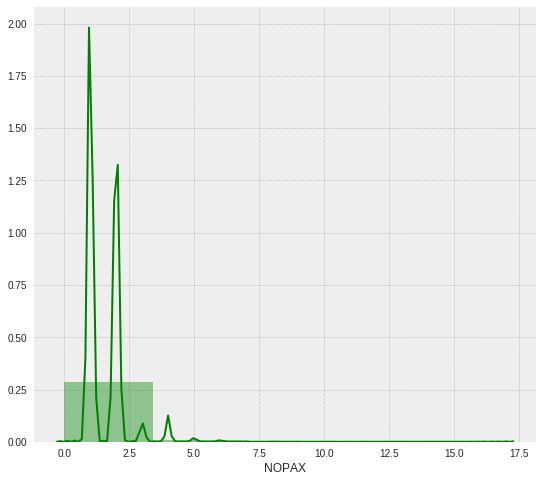

In [20]:
print(propensity['NOPAX'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(propensity['NOPAX'], color='g', bins=5, hist_kws={'alpha': 0.4});

count    34268.000000
mean       180.563869
std        124.537096
min          0.009174
25%        123.710187
50%        151.000000
75%        195.837500
max       5027.000000
Name: rate_per_person, dtype: float64


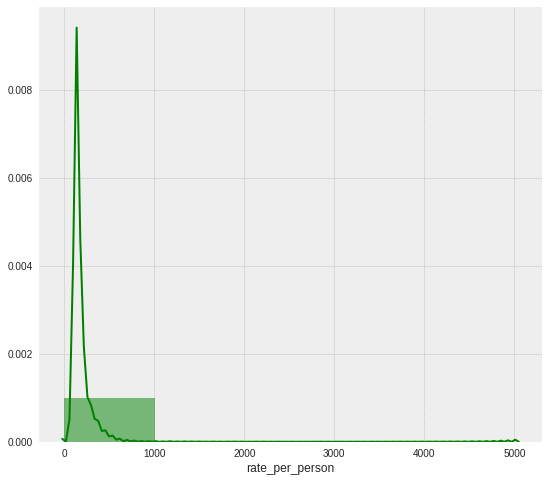

In [28]:
print(propensity['rate_per_person'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(propensity['rate_per_person'].dropna(), color='g', bins=5, hist_kws={'alpha': 0.5}); # Add dropna() to avoid NULL values else it give error [Kumarjit]

count    34319.000000
mean      2988.448696
std       2678.551041
min          0.000000
25%       1388.075000
50%       2339.100000
75%       3631.940000
max      52970.240500
Name: REVENUE, dtype: float64


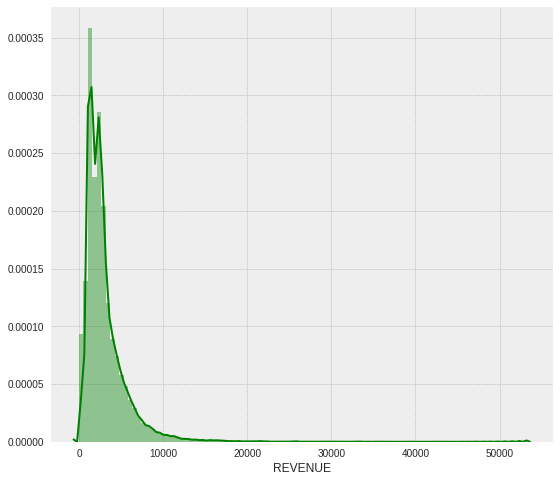

In [19]:
print(propensity['REVENUE'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(propensity['REVENUE'], color='g', bins=100, hist_kws={'alpha': 0.4});

Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones

In [0]:
# before this just creating replica of the data what we have.
kp = propensity

In [12]:
list(set(propensity.dtypes.tolist()))

df_num = propensity.select_dtypes(include = ['float64', 'int64'])
df_num.head()

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
0      2622933        45489            0      22.233333   
1      2564425        45490            0      22.233333   
2      2583856        45497            0      22.233333   
3      4651013        45498            0      22.233333   
4      3229831        45499            0      22.233333   

   Frequency_of_travel_till_july  last_booking_month  Time_since_last_booking  \
0                              1                   1                      575   
1                              1                   1                      575   
2                              1                   1                      575   
3                              1                   1                      575   
4                              4                   1                      200   

   Age_derived  NOPAX  Days_advance_booking  REVENUE  NUMDAYS  
0         46.0      1                   215  3686.55     15.0  
1         42.0      1                   278  2226.05     15.0  
2         45.0      1                    27  1269.00     14.0  
3         40.0      2                   159  2298.00      8.0  
4         67.0      2                   181  3798.00      8.0

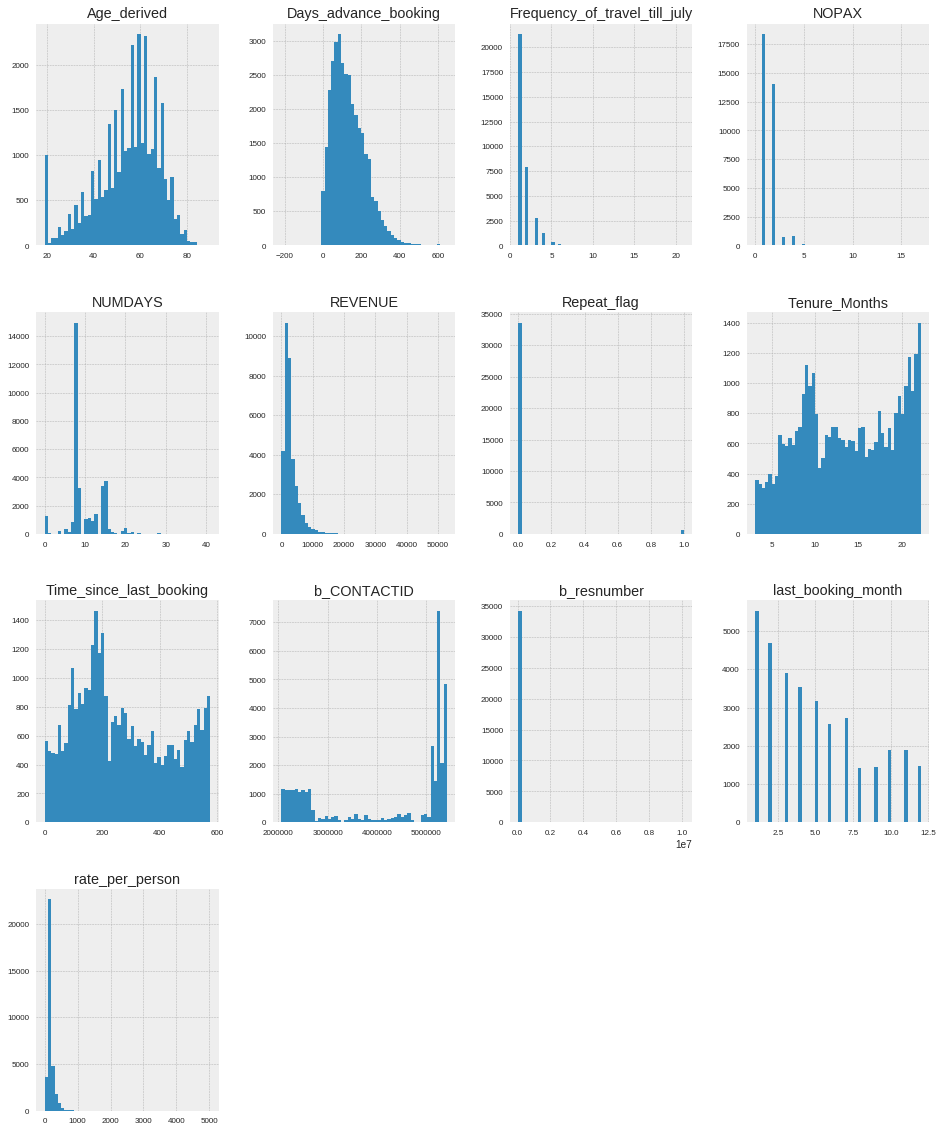

In [33]:
df_num.dropna().hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations, aded dropna() to avoid issues in plotting

**CORRELATION** 

Plotting bivariate plot with other numeric variables with respect to "Frequency_of_travel_till_july"

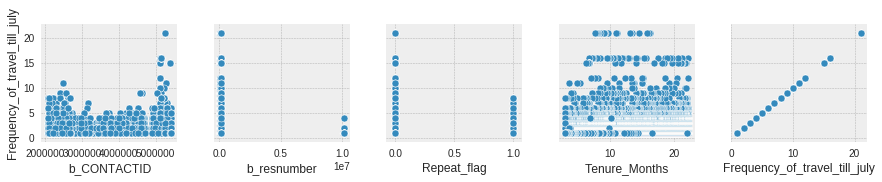

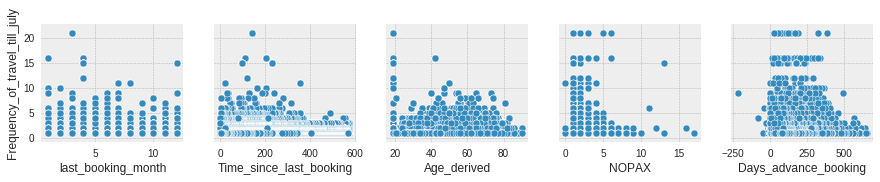

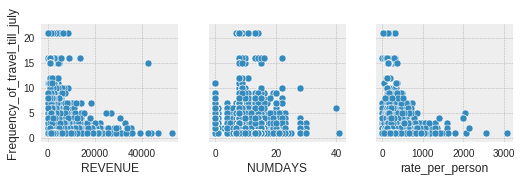

In [29]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Frequency_of_travel_till_july'])

In [0]:
df_num_corr = df_num.corr()['Frequency_of_travel_till_july'][:-1] 

In [31]:
df_num_corr

b_CONTACTID                     -0.100375
b_resnumber                     -0.024401
Repeat_flag                      0.091452
Tenure_Months                   -0.003571
Frequency_of_travel_till_july    1.000000
last_booking_month               0.017177
Time_since_last_booking         -0.302424
Age_derived                     -0.057990
NOPAX                           -0.100192
Days_advance_booking            -0.022833
REVENUE                         -0.092563
NUMDAYS                         -0.060532
Name: Frequency_of_travel_till_july, dtype: float64

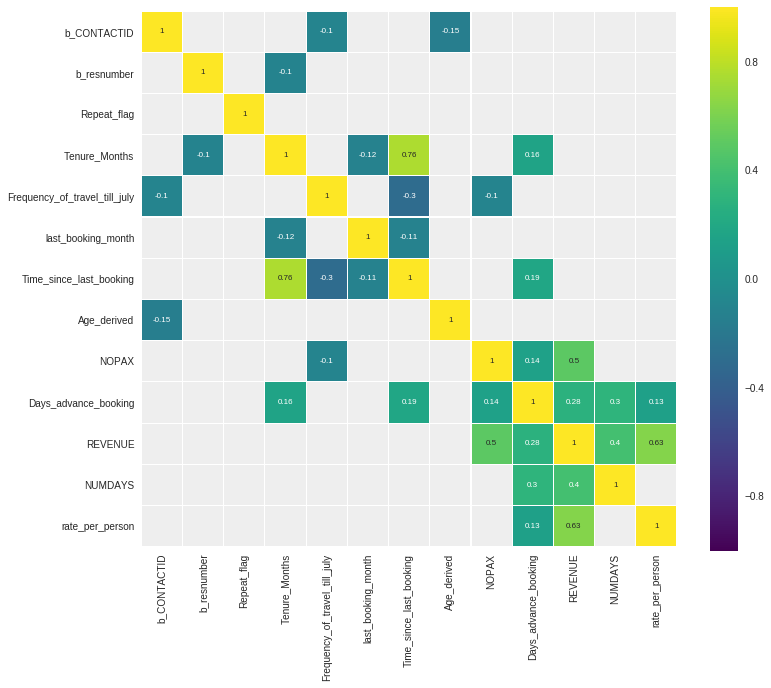

In [33]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**Bivariate relationship - Bivariate regression analysis**

This will be done only with neumerical features

In [34]:
df_num.columns

Index(['b_CONTACTID', 'b_resnumber', 'Repeat_flag', 'Tenure_Months',
       'Frequency_of_travel_till_july', 'last_booking_month',
       'Time_since_last_booking', 'Age_derived', 'NOPAX',
       'Days_advance_booking', 'REVENUE', 'NUMDAYS', 'rate_per_person'],
      dtype='object')

In [36]:
df_num.columns[3]

'Tenure_Months'

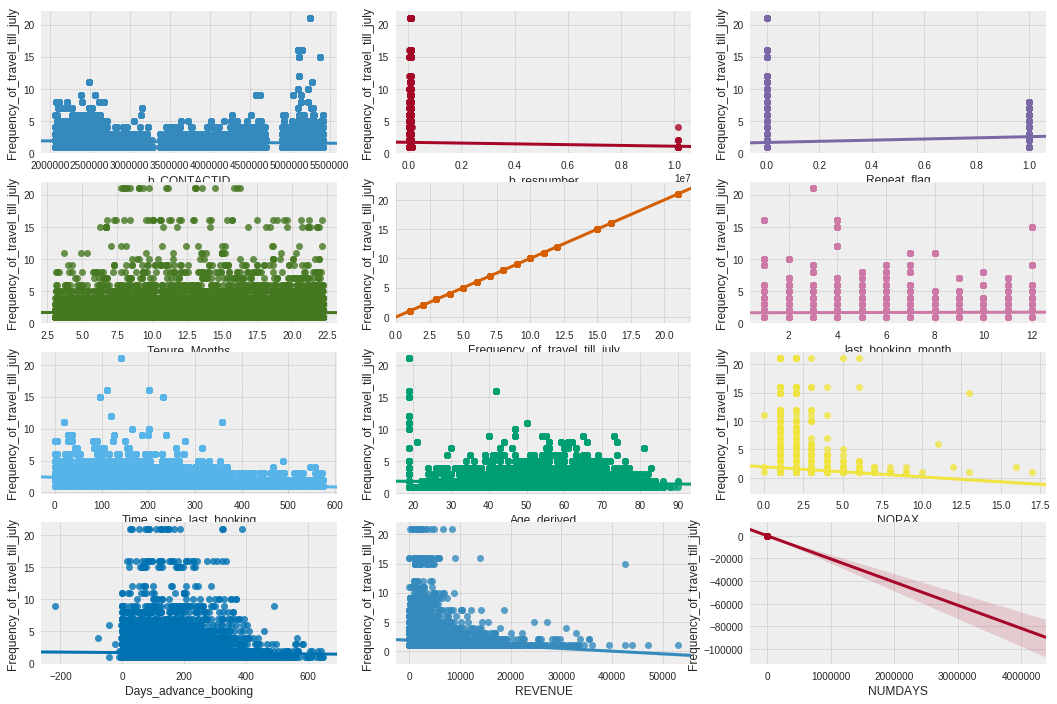

In [38]:
fig, ax = plt.subplots(round(len(df_num.columns) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(df_num.columns) - 1:
        sns.regplot(x=df_num.columns[i],y='Frequency_of_travel_till_july', data=df_num, ax=ax)

**Categorical to Quantitative relationship**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Text xticklabel objects>)

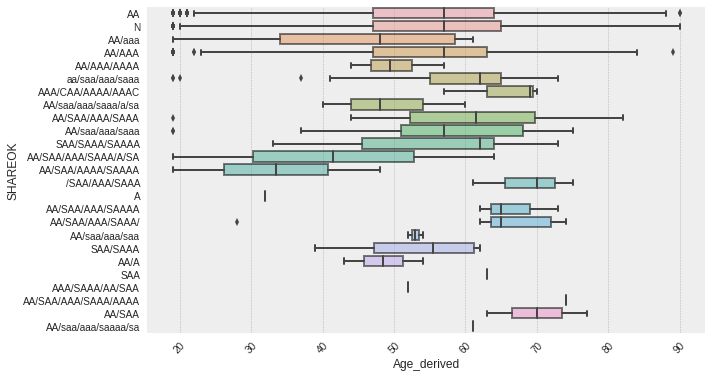

In [40]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Age_derived', y='SHAREOK', data=propensity)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [44]:
Creating a seperate dataset for only categorical clumns
list(set(kp.dtypes.tolist()))

df_cat = kp.select_dtypes(exclude = ['float64', 'int64'])
df_cat.head()

SHAREOK LANDONLYOK AIRINCLUDED  GENDER__F  GENDER__M
0      AA          Y           Y          1          0
1      AA          Y           Y          1          0
2      AA          Y           Y          1          0
3      AA          Y           Y          1          0
4      AA          Y           Y          0          1

In [46]:
df_cat.columns

Index(['SHAREOK', 'LANDONLYOK', 'AIRINCLUDED', 'GENDER__F', 'GENDER__M'], dtype='object')

In [0]:
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.colnumns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

In [47]:
sns.countplot(x=LANDONLYOK, alpha=0.7, data=df_cat, ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

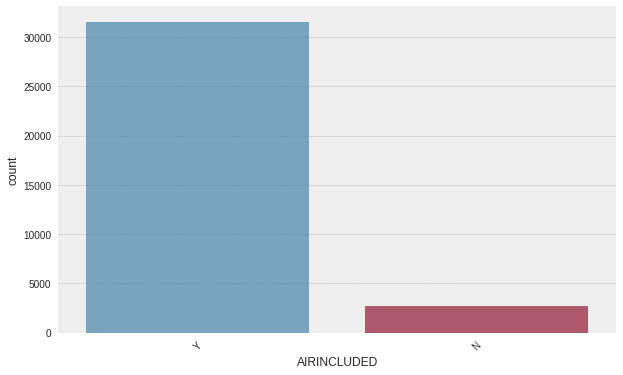

In [49]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x='AIRINCLUDED', alpha=0.7, data=df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

**MISSING VALUE- Analysis and treatment**

In [34]:
total = df_num.isnull().sum().sort_values(ascending=False)
percent = (df_num.isnull().sum()/df_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(5)

Total Missing Count  % of Total Observations
 Numeric Feature                                                  
rate_per_person                        51                 0.001486
NUMDAYS                                51                 0.001486
Age_derived                            31                 0.000903
REVENUE                                 0                 0.000000
Days_advance_booking                    0                 0.000000

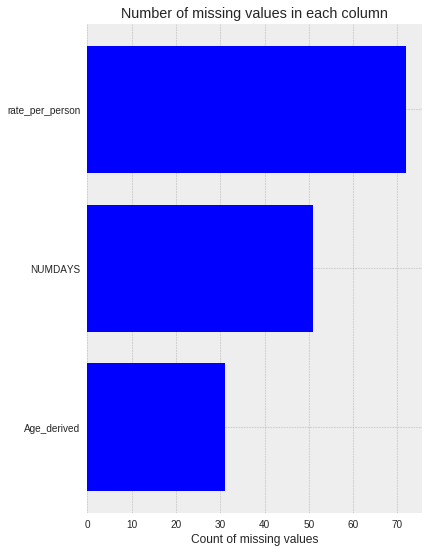

In [66]:
missing_df = df_num.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(6,9))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [0]:
# we can drop the rows and take the complete case for analysis
df.dropna(inplace=True)

In [88]:
# Mean imputation

#df_num['NUMDAYS'].isnull().sum(), df_num['NUMDAYS'].fillna(df_num['NUMDAYS'].mean()).isnull().sum()

# Doing mean imputation for NUMDAYS
df_num['NUMDAYS'].mean(), df_num['NUMDAYS'].fillna(df_num['NUMDAYS'].mean()).mean()


(10.057079491070386, 10.05707949107039)

In [0]:
df_num['rate_per_person'].mean(), df_num['rate_per_person'].fillna(df_num['rate_per_person'].mean()).mean()
df_num['Age_derived'].mean(), df_num['Age_derived'].fillna(df_num['Age_derived'].mean()).mean()

In [13]:
df_num.fillna(df_num.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


**Other imputations are not working... Need to check with Jitin**





Will see Fancy imputation, sklearn.impute

In [70]:
# Using SKlearn imputer

from sklearn.preprocessing import Imputer

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(df_num)
# count the number of NaN values in each column
print(numpy.isnan(data_with_imputed_values).sum())

ModuleNotFoundError: ignored

In [36]:
# For other imputation technique , better to install fancyimpute. 
!pip install ecos  
!pip install CVXcanon  
!pip install fancyimpute  

    100% |████████████████████████████████| 153kB 4.7MB/s 
    100% |████████████████████████████████| 696kB 16.6MB/s 
  Running setup.py bdist_wheel for CVXcanon ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/46/a7/aa/2116e25ce5ef04deae6a3c4d01908449e572393351edf65b14
Successfully built CVXcanon
    100% |████████████████████████████████| 901kB 11.1MB/s 
    100% |████████████████████████████████| 61kB 21.8MB/s 
    100% |████████████████████████████████| 153kB 14.5MB/s 
    100% |████████████████████████████████| 143kB 16.1MB/s 
    100% |████████████████████████████████| 1.4MB 11.6MB/s 
  Running setup.py bdist_wheel for fancyimpute ... - done
  Stored in directory: /root/.cache/pip/wheels/4c/dc/65/3b721b985a3810d645829367fa42007e97db12573e6bb27f9f
  Running setup.py bdist_wheel for knnimpute ... - \ done
  Stored in directory: /root/.cache/pip/wheels/a3/92/31/c3f886471

In [37]:
from fancyimpute import KNN

Using TensorFlow backend.


In [41]:
!pip install numpy --upgrade --user

    100% |████████████████████████████████| 13.9MB 2.1MB/s 


In [42]:
from fancyimpute import MICE as MICE

ImportError: ignored

In [38]:
list(df_num)

['b_CONTACTID',
 'b_resnumber',
 'Repeat_flag',
 'Tenure_Months',
 'Frequency_of_travel_till_july',
 'last_booking_month',
 'Time_since_last_booking',
 'Age_derived',
 'NOPAX',
 'Days_advance_booking',
 'REVENUE',
 'NUMDAYS',
 'rate_per_person']

In [39]:
df_num_kp = pd.DataFrame(KNN(k=3).complete(df_num))

AttributeError: ignored

In [69]:
from fancyimpute import KNN

#fancy impute removes column names.
train_df_cols=list(df_num)

df_num_kp = pd.DataFrame(KNN(k=3).complete(df_num))

df_num_kp.columns=train_df_cols

Using TensorFlow backend.


AttributeError: ignored

**Density analysis or difference analysis of two subgroups**

In [44]:
columns_to_show = ['Time_since_last_booking', 'Age_derived', 'Days_advance_booking','REVENUE','NUMDAYS',
                   'NOPAX']

df_num.groupby(['Repeat_flag'])[columns_to_show].describe(percentiles=[]).T # put .T after ) to get in transposed

Repeat_flag                               0             1
Time_since_last_booking count  33663.000000    656.000000
                        mean     272.198883    238.242378
                        std      162.535925    141.602597
                        min        0.000000      0.000000
                        50%      242.000000    212.000000
                        max      575.000000    570.000000
Age_derived             count  33663.000000    656.000000
                        mean      54.724439     55.301829
                        std       13.287974     11.141165
                        min       19.000000     19.000000
                        50%       57.000000     57.000000
                        max       90.000000     88.000000
Days_advance_booking    count  33663.000000    656.000000
                        mean     134.625048     98.625000
                        std       87.466087     86.057444
                        min     -218.000000    -42.000000
                        50%      120.000000     78.500000
                        max      643.000000    649.000000
REVENUE                 count  33663.000000    656.000000
                        mean    3004.951266   2141.610229
                        std     2688.512344   1925.039056
                        min        0.000000      0.000000
                        50%     2352.050000   1652.350000
                        max    52970.240500  17242.960000
NUMDAYS                 count  33663.000000    656.000000
                        mean      10.074494      9.163458
                        std        3.958583      4.817263
                        min        0.000000      0.000000
                        50%        8.000000      8.000000
                        max       41.000000     23.000000
NOPAX                   count  33663.000000    656.000000
                        mean       1.568131      1.315549
                        std        0.768673      0.669603
                        min        0.000000      1.000000
                        50%        1.000000      1.000000
                        max       17.000000     11.000000

In [45]:
df_num.groupby(['Repeat_flag'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max]).T

Repeat_flag                              0             1
Time_since_last_booking mean    272.198883    238.242378
                        std     162.535925    141.602597
                        amin      0.000000      0.000000
                        amax    575.000000    570.000000
Age_derived             mean     54.724439     55.301829
                        std      13.287974     11.141165
                        amin     19.000000     19.000000
                        amax     90.000000     88.000000
Days_advance_booking    mean    134.625048     98.625000
                        std      87.466087     86.057444
                        amin   -218.000000    -42.000000
                        amax    643.000000    649.000000
REVENUE                 mean   3004.951266   2141.610229
                        std    2688.512344   1925.039056
                        amin      0.000000      0.000000
                        amax  52970.240500  17242.960000
NUMDAYS                 mean     10.074494      9.163458
                        std       3.958583      4.817263
                        amin      0.000000      0.000000
                        amax     41.000000     23.000000
NOPAX                   mean      1.568131      1.315549
                        std       0.768673      0.669603
                        amin      0.000000      1.000000
                        amax     17.000000     11.000000

In [59]:
pd.crosstab(kp['Repeat_flag'], kp['AIRINCLUDED'])

AIRINCLUDED     N      Y
Repeat_flag             
0            2617  30999
1             106    546

In [62]:
pd.crosstab(kp['Repeat_flag'], kp['AIRINCLUDED'], normalize=True)

AIRINCLUDED         N         Y
Repeat_flag                    
0            0.076369  0.904605
1            0.003093  0.015933

# MODELLING START

**Training and testing split**

In [15]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
df_num.head(2)

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
0      2622933        45489            0      22.233333   
1      2564425        45490            0      22.233333   

   Frequency_of_travel_till_july  last_booking_month  Time_since_last_booking  \
0                              1                   1                      575   
1                              1                   1                      575   

   Age_derived  NOPAX  Days_advance_booking  REVENUE  NUMDAYS  rate_per_person  
0         46.0      1                   215  3686.55     15.0       245.770000  
1         42.0      1                   278  2226.05     15.0       148.403333

In [76]:
df_num.columns[2]

'Repeat_flag'

In [17]:
# store feature matrix in "X"
X = df_num.iloc[:,3:12]   
# store response vector in "y"
Y = df_num.iloc[:,2]  

print(Y.shape)
print(X.shape)

(34319,)
(34319, 9)


In [49]:
# Checking distribution of zero and one in dependent for class imbalance checking
counts = df_num['Repeat_flag'].value_counts()
counts

0    33663
1      656
Name: Repeat_flag, dtype: int64

In [50]:
counts = df_num.iloc[:,2].value_counts()
counts

0    33663
1      656
Name: Repeat_flag, dtype: int64

In [0]:
# creating testing and training set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, Y_train)

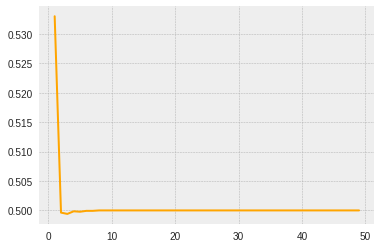

In [53]:
# For an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
v=[]




k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, Y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.roc_auc_score(Y_test, k_pred)) #auc, accuracy_score, f1_score, classification_report,confusion_matrix,roc_auc_score, roc_auc_score, roc_curve,cohen_kappa_score can be used


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Orange',)
plt.show()

### Clearly KNN is a faliure here

In [0]:
#copying data for experimentation
kp_norm=df_num
kp_norm=kp_norm.iloc[:,2:12]# removing index variables like CONTACTID and RESNUMBER

In [57]:
kp_norm.head(2)

Repeat_flag  Tenure_Months  Frequency_of_travel_till_july  \
0            0      22.233333                              1   
1            0      22.233333                              1   

   last_booking_month  Time_since_last_booking  Age_derived  NOPAX  \
0                   1                      575         46.0      1   
1                   1                      575         42.0      1   

   Days_advance_booking  REVENUE  NUMDAYS  
0                   215  3686.55     15.0  
1                   278  2226.05     15.0

In [0]:
normalized_df=(kp_norm-kp_norm.mean())/kp_norm.std()# Creting stadard normal

In [60]:
normalized_df.head(2)

Repeat_flag  Tenure_Months  Frequency_of_travel_till_july  \
0    -0.139595       1.545602                      -0.499787   
1    -0.139595       1.545602                      -0.499787   

   last_booking_month  Time_since_last_booking  Age_derived     NOPAX  \
0           -1.205904                  1.87054    -0.659266 -0.733782   
1           -1.205904                  1.87054    -0.961146 -0.733782   

   Days_advance_booking   REVENUE   NUMDAYS  
0              0.925621  0.260626  1.242375  
1              1.644988 -0.284631  1.242375

In [0]:
# below are the codes which can be reused. We can do it using each columns as well
normalized_df=(df-df.mean())/df.std()# Creting stadard normal
normalized_df=(df-df.min())/(df.max()-df.min())# min-max normalization

# Also another option below

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pandas.DataFrame(x_scaled)


In [0]:
# for the current work I am selecting min-max normalization

normalized_df=(kp_norm-kp_norm.min())/(kp_norm.max()-kp_norm.min())

In [62]:
normalized_df.head(2)

Repeat_flag  Tenure_Months  Frequency_of_travel_till_july  \
0          0.0            1.0                            0.0   
1          0.0            1.0                            0.0   

   last_booking_month  Time_since_last_booking  Age_derived     NOPAX  \
0                 0.0                      1.0     0.380282  0.058824   
1                 0.0                      1.0     0.323944  0.058824   

   Days_advance_booking   REVENUE   NUMDAYS  
0              0.499423  0.069597  0.365854  
1              0.572088  0.042025  0.365854

In [63]:
# store feature matrix in "X"
X = normalized_df.iloc[:,1:9]   
# store response vector in "y"
Y = normalized_df.iloc[:,0]  

print(Y.shape)
print(X.shape)

(34319,)
(34319, 8)


In [0]:
# Need to re establish the training and testing

# creating testing and training set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

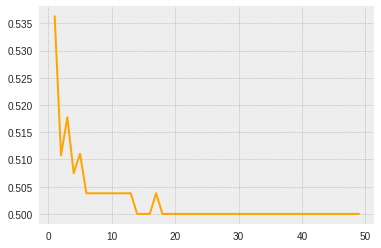

In [65]:
# For an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
v=[]




k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, Y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.roc_auc_score(Y_test, k_pred)) #auc, accuracy_score, f1_score, classification_report,confusion_matrix,roc_auc_score, roc_auc_score, roc_curve,cohen_kappa_score can be used


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Orange',)
plt.show()

### No Improvement really. we shall go for other classifires

In [0]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, ElasticNet
from sklearn.ensemble import GradientBoostingClassifier,RandomTreesEmbedding,RandomForestClassifier
from sklearn.metrics import auc, accuracy_score, f1_score, classification_report,confusion_matrix,roc_auc_score, roc_auc_score, roc_curve,cohen_kappa_score

## Model diagonestic

In [0]:
# scores for true and pred values
def scores(y_true,y_pred,cutoff = 0.5):
    y_bin = np.array(y_pred >= cutoff, dtype=np.int8)
    print('AUC: {} Accuracy: {} F1 Score: {} Cohen Kappa: {} Confusion Matrix: \n{}'.format(roc_auc_score(y_true,y_pred),accuracy_score(y_true,y_bin),
                                                            f1_score(y_true,y_bin),cohen_kappa_score(y_true,y_bin),confusion_matrix(y_true,y_bin)))

In [0]:
# funciton for plotting roc curves of models on train and test data
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):

    sns.set('talk', 'whitegrid', 'dark', font_scale=1, 
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob >= best_threshold

    # cm_train = confusion_matrix(y_train_true, y_train)
    # acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train_prob)

    # print('Train Accuracy: {}'.format(acc_train))
    # print('Train AUC: {}'.format(auc_train))
    # print('Train Confusion Matrix:')
    # print(cm_train)
    print('Train Performance')
    scores(y_train_true, y_train_prob, cutoff=best_threshold)

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob >= best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    # acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test_prob)

    # print('Test Accuracy: {}'.format(acc_test))
    # print('Test AUC: {}'.format(auc_test))
    # print('Test Confusion Matrix:')
    # print(cm_test)
    
    print('Test Performance')
    scores(y_test_true, y_test_prob, cutoff=best_threshold)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold

In [0]:
# logistic regression
clf_lr = LogisticRegression(penalty='l1',C = 0.1,warm_start=True).fit(X_train,Y_train)
pred_lr = clf_lr.predict_proba(X_test)

In [83]:
scores(Y_test,pred_lr[:,1],cutoff=0.2)

AUC: 0.6467898683807775 Accuracy: 0.9806235431235432 F1 Score: 0.0 Cohen Kappa: -0.0002892681515764828 Confusion Matrix: 
[[6731    1]
 [ 132    0]]


Train Performance
AUC: 0.7181879278143948 Accuracy: 0.6628300855946093 F1 Score: 0.07179384337711821 Cohen Kappa: 0.0369647600840608 Confusion Matrix: 
[[17840  9091]
 [  166   358]]
Test Performance
AUC: 0.6467898683807775 Accuracy: 0.6644813519813519 F1 Score: 0.06038351693186454 Cohen Kappa: 0.024899441431758595 Confusion Matrix: 
[[4487 2245]
 [  58   74]]


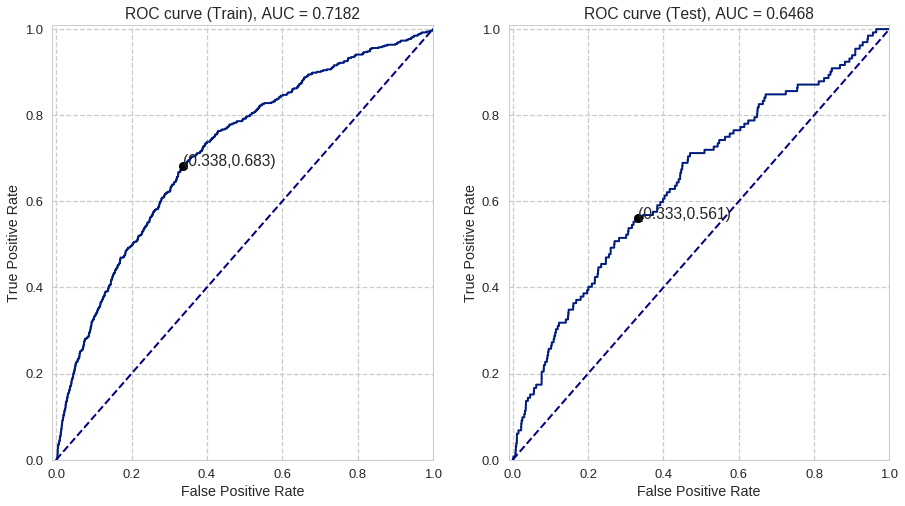

0.021250076148307078

In [85]:

plot_ROC(y_train_true=Y_train, 
         y_train_prob=clf_lr.predict_proba(X_train)[::,1],
         y_test_true = Y_test, 
         y_test_prob = clf_lr.predict_proba(X_test)[::,1])

In [0]:
#random forest classifier
clf_rf = RandomForestClassifier(n_estimators=50,max_depth=15,criterion='gini',min_samples_leaf=5,min_samples_split=10,
                                oob_score=True,
                                min_impurity_decrease=0.0001,
                                n_jobs=-1).fit(X_train,Y_train)

In [87]:
pred_rf = clf_rf.predict_proba(X_test)
scores(Y_test,pred_rf[:,1],cutoff=0.2)

AUC: 0.6920615468409586 Accuracy: 0.9807692307692307 F1 Score: 0.0 Cohen Kappa: 0.0 Confusion Matrix: 
[[6732    0]
 [ 132    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Performance
AUC: 0.7319010896095506 Accuracy: 0.6703332726279366 F1 Score: 0.07273844892941297 Cohen Kappa: 0.03798828761239614 Confusion Matrix: 
[[18049  8882]
 [  169   355]]
Test Performance
AUC: 0.6920615468409586 Accuracy: 0.6714743589743589 F1 Score: 0.06625258799171843 Cohen Kappa: 0.031021204158196536 Confusion Matrix: 
[[4529 2203]
 [  52   80]]


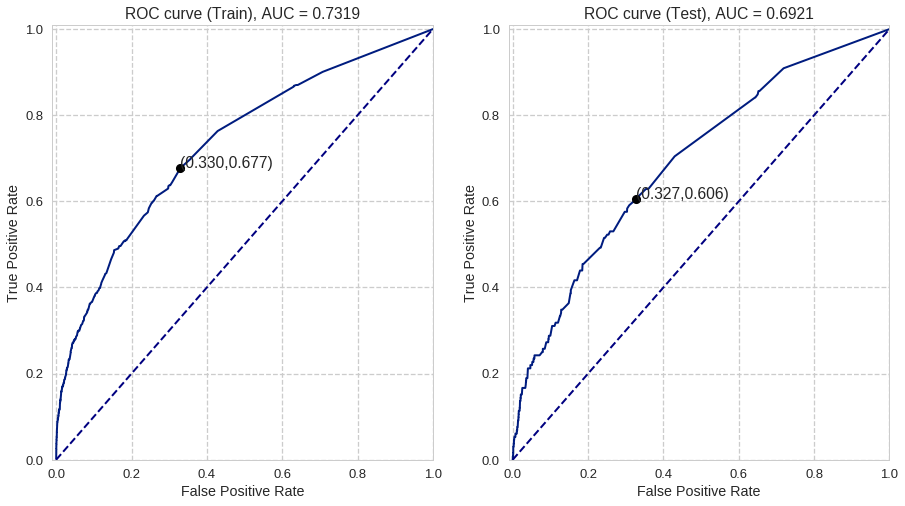

0.017347209352471388

In [88]:
plot_ROC(y_train_true=Y_train, 
         y_train_prob=clf_rf.predict_proba(X_train)[::,1],
         y_test_true = Y_test, 
         y_test_prob = clf_rf.predict_proba(X_test)[::,1])

## PCA and SVM

In [125]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import cross_validation


pca = PCA(n_components=3)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf_svm = SVC(probability =True)
clf_svm.fit(X_t_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Train Performance
AUC: 0.3785279939319057 Accuracy: 0.019413585867783648 F1 Score: 0.037468716481944934 Cohen Kappa: 1.2760552605461939e-05 Confusion Matrix: 
[[    9 26922]
 [    0   524]]
Test Performance
AUC: 0.38288747546768936 Accuracy: 0.019376456876456876 F1 Score: 0.03774124374553252 Cohen Kappa: 5.714057151884333e-06 Confusion Matrix: 
[[   1 6731]
 [   0  132]]


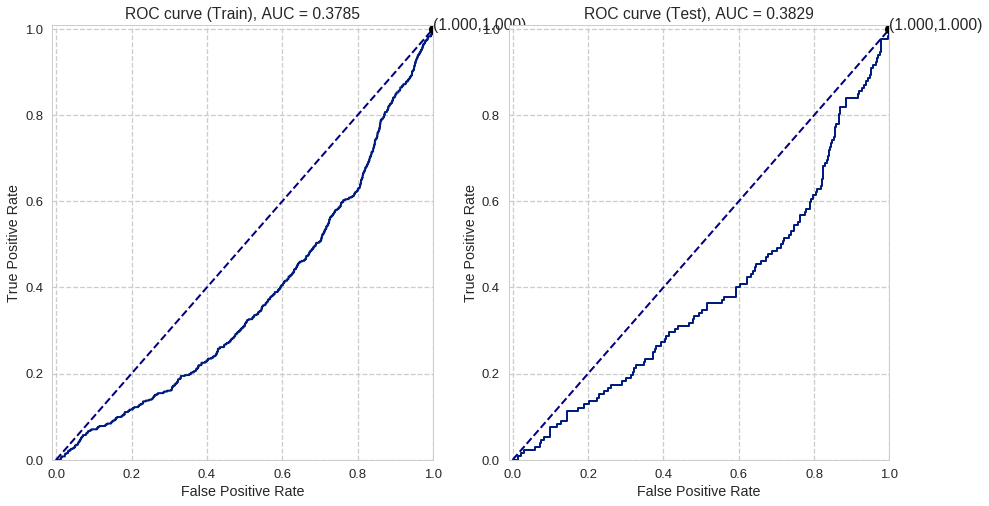

0.015520341450348675

In [126]:
plot_ROC(y_train_true=Y_train, 
         y_train_prob=clf_svm.predict_proba(X_t_train)[::,1],
         y_test_true = Y_test, 
         y_test_prob = clf_svm.predict_proba(X_t_test)[::,1])

**Verifying Training and Test Sets Similar Distributions**

In [0]:
# https://www.kaggle.com/athi94/investigating-imputation-methods

import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import itertools

def distComparison(df1, df2):
    a = len(df1.columns)
    if a%2 != 0:
        a += 1
    
    n = np.floor(np.sqrt(a)).astype(np.int64)
    
    while a%n != 0:
        n -= 1
    
    m = (a/n).astype(np.int64)
    coords = list(itertools.product(list(range(m)), list(range(n))))
    
    numerics = df1.select_dtypes(include=[np.number]).columns
    cats = df1.select_dtypes(include=['category']).columns
    
    fig = plt.figure(figsize=(15, 15))
    axes = gs.GridSpec(m, n)
    axes.update(wspace=0.25, hspace=0.25)
    
    for i in range(len(numerics)):
        x, y = coords[i]
        ax = plt.subplot(axes[x, y])
        col = numerics[i]
        sns.kdeplot(df1[col].dropna(), ax=ax, label='df1').set(xlabel=col)
        sns.kdeplot(df2[col].dropna(), ax=ax, label='df2')
        
    for i in range(0, len(cats)):
        x, y = coords[len(numerics)+i]
        ax = plt.subplot(axes[x, y])
        col = cats[i]

        df1_temp = df1[col].value_counts()
        df2_temp = df2[col].value_counts()
        df1_temp = pd.DataFrame({col: df1_temp.index, 'value': df1_temp/len(df1), 'Set': np.repeat('df1', len(df1_temp))})
        df2_temp = pd.DataFrame({col: df2_temp.index, 'value': df2_temp/len(df2), 'Set': np.repeat('df2', len(df2_temp))})

        sns.barplot(x=col, y='value', hue='Set', data=pd.concat([df1_temp, df2_temp]), ax=ax).set(ylabel='Percentage')
        
    
        


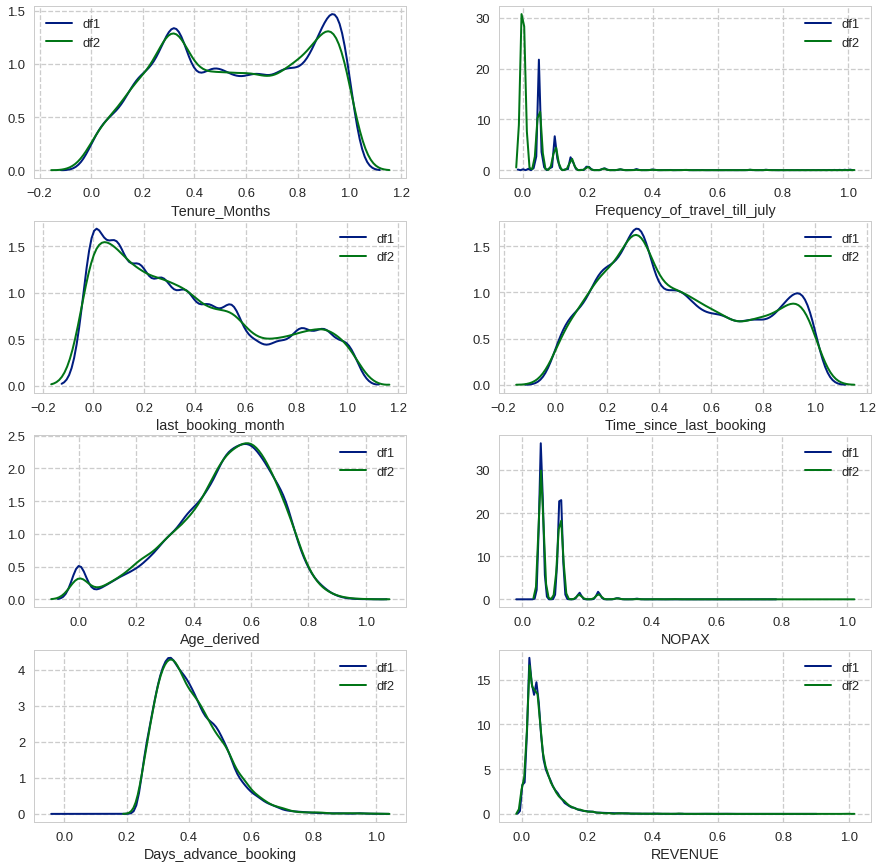

In [91]:
distComparison(X_train, X_test)

### Repeat the same with 0 vs 1 to check difference of distribution- Kumarjit

#### Type conversion and data subsetting

In [0]:
# first data subsetting , need to create two data set for 0 and 1 on dependent variable
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
#k1 = df[['Time', 'Product']].query('Product == p_id and start_time <= Time < end_time')
# df.query('gender == "m" and price < 100')

# convert all DataFrame columns to the int64 dtype
df = df.astype(int)

# convert column "a" to int64 dtype and "b" to complex type
df = df.astype({"a": int, "b": complex})

# convert Series to float16 type
s = s.astype(np.float16)

# convert Series to Python strings
s = s.astype(str)

# convert Series to categorical type - see docs for more details
s = s.astype('category')



In [0]:
df_num = df_num.astype({"Repeat_flag": int})

In [114]:
df_num['Repeat_flag'].dtype

dtype('int64')

In [115]:
df_num.head(1)

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
0      2622933        45489            0      22.233333   

   Frequency_of_travel_till_july  last_booking_month  Time_since_last_booking  \
0                              1                   1                      575   

   Age_derived  NOPAX  Days_advance_booking  REVENUE  NUMDAYS  rate_per_person  
0         46.0      1                   215  3686.55     15.0       230.471875

In [0]:
X_train_Repeat = df_num[['Repeat_flag','Tenure_Months', 'Frequency_of_travel_till_july','Time_since_last_booking','Age_derived','NOPAX','Days_advance_booking','REVENUE']].query('Repeat_flag == 1')
X_train_Nonrepeat = df_num[['Repeat_flag','Tenure_Months', 'Frequency_of_travel_till_july','Time_since_last_booking','Age_derived','NOPAX','Days_advance_booking','REVENUE']].query('Repeat_flag == 0')

In [0]:
# Dropping repeat flag column
X_train_Repeat= X_train_Repeat.drop('Repeat_flag', 1)#where 1 is the axis number (0 for rows and 1 for columns.)
# You can use the below as well
df.drop('column_name', axis=1, inplace=True)


In [0]:
X_train_Repeat.drop('Repeat_flag', axis=1, inplace=True)
X_train_Nonrepeat.drop('Repeat_flag', axis=1, inplace=True)

In [122]:
X_train_Repeat.dtypes

Repeat_flag                        int64
Tenure_Months                    float64
Frequency_of_travel_till_july      int64
Time_since_last_booking            int64
Age_derived                      float64
NOPAX                              int64
Days_advance_booking               int64
REVENUE                          float64
dtype: object

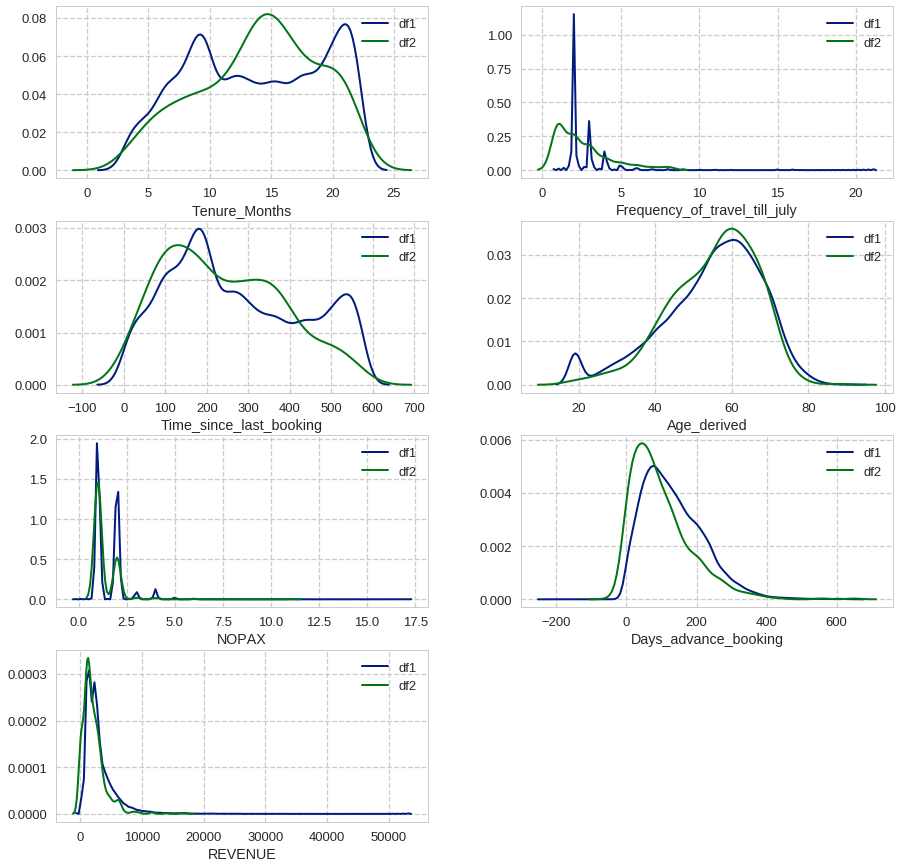

In [124]:
distComparison(X_train_Nonrepeat, X_train_Repeat)

**Missing at Random?**
MCAR = missing completely at random.

In essence, if we split the data into two more sets. Data missing and Data present. Then check whether the distribution of the variables in each of these sets is the same, we can assume the data is missing completely at random.

In [0]:
age_present = train.dropna().drop('Age', 1)
age_missing = train[train.isnull().any(axis=1)].drop('Age', 1)

age_present.Parch = age_present.Parch.astype('category', categories=list(range(8)), ordered=True)
age_missing.Parch = age_missing.Parch.astype('category', categories=list(range(8)), ordered=True)

age_present.SibSp = age_present.SibSp.astype('category', categories=list(range(9)), ordered=True)
age_missing.SibSp = age_missing.SibSp.astype('category', categories=list(range(9)), ordered=True)

distComparison(age_present.drop('Survived', 1), age_missing.drop('Survived', 1))

In [0]:
# QQ plot another way

#import numpy as np
import statsmodels.api as sm
#import pylab

test = sherlock.Errors_in_file_t3

sm.qqplot(test, line='45')
pylab.show()

In [0]:
# Anderson Darling test for normality

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
# dist ‘norm’,’expon’,’logistic’,’gumbel’,’gumbel_l’, gumbel_r’

stats.anderson(sherlock.Aborting_Process_t1, dist='norm')

In [0]:
stats.shapiro(sherlock.Aborting_Process_t1)

### Trying with cross- validation methods for improvement

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [0]:
svc = SVC(gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(random_state=111)
abc = AdaBoostClassifier(n_estimators=100, random_state=111)
bc = BaggingClassifier(n_estimators=100, random_state=111)

In [0]:
svc_parameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[1, 10]}

In [0]:
param_grid_RF = {
    'bootstrap': [True],
    'max_features': [20, 30,40,50],
    'n_estimators': [100, 200, 300,500]
}

In [133]:
!pip install xgboost

In [134]:
!pip install --upgrade xgboost

    100% |████████████████████████████████| 16.6MB 1.3MB/s 
  Found existing installation: xgboost 0.7.post4
    Uninstalling xgboost-0.7.post4:
      Successfully uninstalled xgboost-0.7.post4


In [0]:
from xgboost import XGBClassifier

In [0]:
?XGBClassifier

In [0]:
xgb = XGBClassifier()
param_grid_xgb= {
    'learning_rate': [0.1,0.01,0.05],
    'n_estimators': [100,200,300,500]
}

In [0]:
clf = GridSearchCV(rfc,param_grid_RF,scoring = 'roc_auc', cv = 5,verbose=50,n_jobs=-1)
clf.fit(X_train,Y_train)

In [140]:
clf_xgb = GridSearchCV(xgb,param_grid_xgb,scoring = 'roc_auc', cv = 5,verbose=50,n_jobs=-1)
clf_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV]  learning_rate=0.1, n_estimators=100, score=0.7573885986546094, total=   1.7s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV]  learning_rate=0.1, n_estimators=100, score=0.7690582285643556, total=   1.8s
[CV] learning_rate=0.1, n_estimators=100 .............................
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[CV]  learning_rate=0.1, n_estimators=100, score=0.7336613442257705, total=   1.5s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV]  learning_rate=0.1, n_estimators=100, score=0.7631478436157233, total=   1.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01, 0.05], 'n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=50)

In [141]:
clf_xgb.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [0]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=500,n_jobs=-1).fit(X_train,Y_train)

Train Performance
AUC: 0.937394290923284 Accuracy: 0.8199599344381715 F1 Score: 0.16120821313422704 Cohen Kappa: 0.13098619418771762 Confusion Matrix: 
[[22037  4894]
 [   49   475]]
Test Performance
AUC: 0.726507499234772 Accuracy: 0.8066724941724942 F1 Score: 0.09419795221843003 Cohen Kappa: 0.06134885872078777 Confusion Matrix: 
[[5468 1264]
 [  63   69]]


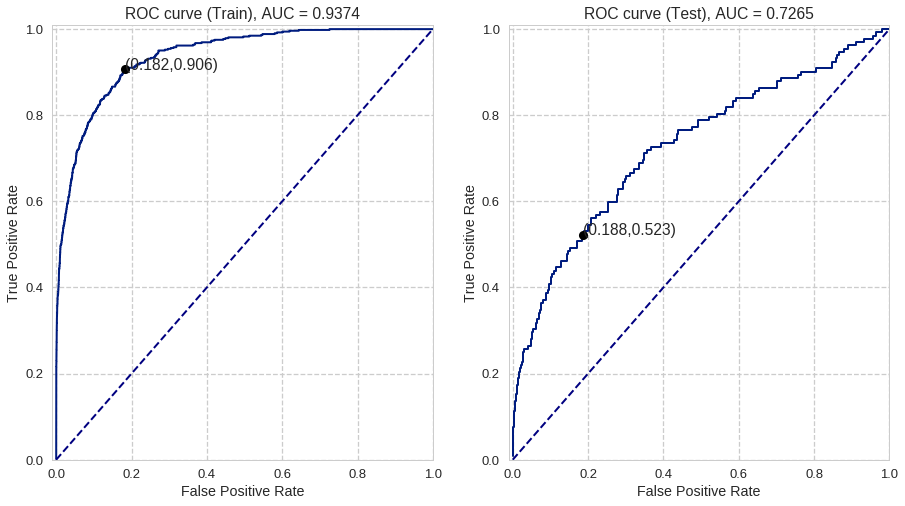

0.023856927

In [146]:
plot_ROC(y_train_true=Y_train, 
         y_train_prob=xgb.predict_proba(X_train)[::,1],
         y_test_true = Y_test, 
         y_test_prob = xgb.predict_proba(X_test)[::,1])

In [0]:
results=pd.DataFrame({'id':test.id, 'score':  np.array(xgb.predict(test_x), dtype=np.int8) })

In [0]:
results.to_csv('output_xgb.tsv',sep=',',index=False)

### Integrating all the models in to a single graph.. Mihgt be requred for cross comparing results

In [0]:
# #############################################################################
# Benchmark classifiers
from time import time
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, Y_train) # this might need a change based on what we have taken
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("Validation time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(Y_test, pred)
    print("accuracy:   %0.3f" % score)
    
    f1_score = metrics.f1_score(Y_test, pred)
    print("f1_score:   %0.3f" % f1_score)
    
    precision_score = metrics.precision_score(Y_test, pred)
    print("precision_score:   %0.3f" % precision_score)
    
    recall_score = metrics.recall_score(Y_test, pred)
    print("recall_score:   %0.3f" % recall_score)
    
    roc_auc_score = metrics.roc_auc_score(Y_test, pred)
    print("roc_auc_score:   %0.3f" % roc_auc_score)
    
    fpr, tpr, thresh = metrics.roc_curve(Y_test, pred)
    
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        #print("top 20 keywords per class:")
        #for i, label in enumerate(target_names):
            #top20 = np.argsort(clf.coef_[i])[-20:]
            #print(feature_names[top20])
        print()

    print("classification report:")
    print(metrics.classification_report(Y_test, pred,
                                            target_names=['class1','class0']))

    print("confusion matrix:")
    print(metrics.confusion_matrix(Y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score,train_time,test_time,f1_score,precision_score,recall_score,roc_auc_score,fpr,tpr

In [0]:
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        #(KNeighborsClassifier(n_neighbors=5,n_jobs=4), "kNN"),
        (RandomForestClassifier(n_estimators=500,max_features=50,n_jobs=4), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,tol=1e-2)))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.1)))
results.append(benchmark(BernoulliNB(alpha=.1)))

In [156]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 30, 'subsample': 0.8, 'min_samples_split' : 10,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 3}
runresult= benchmark(ensemble.GradientBoostingClassifier(**params))

________________________________________________________________________________
Training: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=30,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=3, subsample=0.8, verbose=0,
              warm_start=False)
train time: 183.691s
Validation time:  0.545s
accuracy:   0.981
f1_score:   0.086
precision_score:   0.857
recall_score:   0.045
roc_auc_score:   0.523
classification report:
             precision    recall  f1-score   support

     class1       0.98      1.00      0.99      6732
     class0       0.86      0.05      0.09       132

avg / total       0.98      0.98      0.97      6864

confusion matrix:
[[6731    1]
 [ 126    6]]



In [0]:
# VVI step , we are creating an empty list and going to apend result of each of them one by one

results = []
results.append(runresult)

In [158]:
results

[('GradientBoostingClassifier',
  0.981497668997669,
  183.69124293327332,
  0.544783353805542,
  0.08633093525179857,
  0.8571428571428571,
  0.045454545454545456,
  0.5226530005941771,
  array([0.00000000e+00, 1.48544266e-04, 1.00000000e+00]),
  array([0.        , 0.04545455, 1.        ]))]

In [162]:
from sklearn.linear_model import LogisticRegression
print('=' * 80)
print("Logistic regression")
runresult = benchmark(LogisticRegression(penalty="l2",max_iter=500))


Logistic regression
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 0.101s
Validation time:  0.001s
accuracy:   0.981
f1_score:   0.000
precision_score:   0.000
recall_score:   0.000
roc_auc_score:   0.500
dimensionality: 8
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.98      1.00      0.99      6732
     class0       0.00      0.00      0.00       132

avg / total       0.96      0.98      0.97      6864

confusion matrix:
[[6732    0]
 [ 132    0]]



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
results.append(runresult)

In [164]:
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.006s
Validation time:  0.001s
accuracy:   0.549
f1_score:   0.048
precision_score:   0.025
recall_score:   0.591
roc_auc_score:   0.570
classification report:
             precision    recall  f1-score   support

     class1       0.99      0.55      0.70      6732
     class0       0.03      0.59      0.05       132

avg / total       0.97      0.55      0.69      6864

confusion matrix:
[[3693 3039]
 [  54   78]]



In [168]:
df=pd.DataFrame()
for i in range(8):
    temp=[x[i] for x in results]
    df[i]=temp

df.columns=["classifier_Name","Accuracy_score","train_time","test_time","f1_score","precision_score","recall_score","roc_auc_score"]
print(df)

              classifier_Name  Accuracy_score  train_time  test_time  \
0  GradientBoostingClassifier        0.981498  183.691243   0.544783   
1          LogisticRegression        0.980769    0.101418   0.000861   
2             NearestCentroid        0.549388    0.006191   0.001344   

   f1_score  precision_score  recall_score  roc_auc_score  
0  0.086331         0.857143      0.045455       0.522653  
1  0.000000         0.000000      0.000000       0.500000  
2  0.048015         0.025024      0.590909       0.569742  


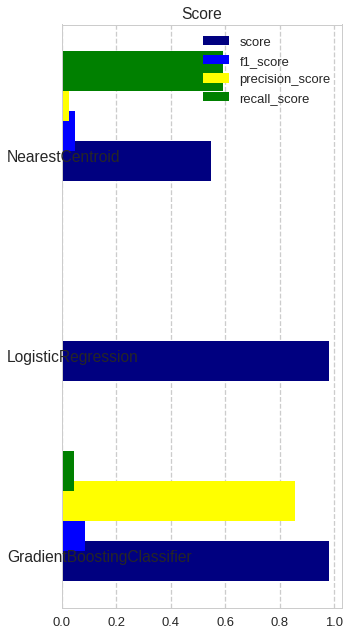

In [170]:
# make some plots
indices = np.arange(len(results))

result = [[x[i] for x in results] for i in range(8)]

clf_names, score, train_time, test_time,f1_score,precision_score,recall_score,roc_auc_score = result
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(6, 9))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .15, f1_score, .2, label="f1_score", color='blue')
plt.barh(indices + .3, precision_score, .2, label="precision_score", color='yellow')
plt.barh(indices + .45, recall_score, .2, label="recall_score", color='green')
#plt.barh(indices + 1.2, roc_auc_score, .2, label="roc_auc_score", color='darkorange')

#plt.barh(indices + .3, training_time, .2, label="training time",
#         color='c')
#plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.2, i, c)

plt.show()

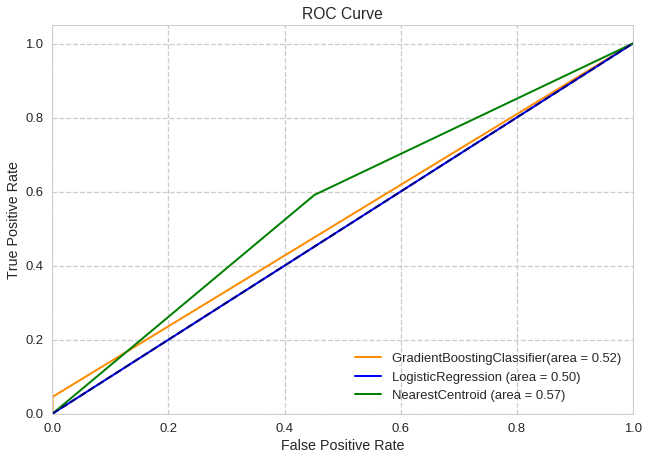

In [171]:
# make some plots
indices = np.arange(len(results))

result_roc = [[x[i] for x in results] for i in range(7,10)]
roc_auc_score,fpr,tpr = result_roc
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=2, label='GradientBoostingClassifier(area = %0.2f)' % roc_auc_score[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=2, label='LogisticRegression (area = %0.2f)' % roc_auc_score[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=2, label='NearestCentroid (area = %0.2f)' % roc_auc_score[2])
#plt.plot(fpr[3], tpr[3], color='yellow',
#         lw=2, label='Linear svc(L1) (area = %0.2f)' % roc_auc_score[3])
#plt.plot(fpr[4], tpr[4], color='black',
#         lw=2, label='Nearest Centroid (area = %0.2f)' % roc_auc_score[4])
#plt.plot(fpr[5], tpr[5], color='red',
#         lw=2, label='Multinomial NB (area = %0.2f)' % roc_auc_score[5])
#plt.plot(fpr[6], tpr[6], color='pink',
#         lw=2, label='Bernoli NB (area = %0.2f)' % roc_auc_score[6])



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Pending 

## FEATUERE SELECTION , DATA QUALITY REPORT , SMEOTE, FANCY IMPUTE, FACTOR ANALYSIS, DISCREMENANT ANALYSIS, ANOVA, MANOVA, ANCOVA, MULTIDIMENTIONAL SCALING, MULTI-LAYER PERCEPTRON

## ANOMALLY DETECTION WAY OF CLASSIFYING

In [0]:
from sklearn.manifold import TSNE
from matplotlib import pyplot

In [177]:
df_num.head(1)

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
0      2622933        45489            0      22.233333   

   Frequency_of_travel_till_july  last_booking_month  Time_since_last_booking  \
0                              1                   1                      575   

   Age_derived  NOPAX  Days_advance_booking  REVENUE  NUMDAYS  rate_per_person  
0         46.0      1                   215  3686.55     15.0       230.471875

In [0]:
df_IF=df_num.iloc[:,2:11]


In [0]:
df_plt=df_IF[df_IF['Repeat_flag']==0].sample(1000)
df_plt_pos=df_IF[df_IF['Repeat_flag']==1].sample(20)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Repeat_flag']
X_plt=df_plt.drop('Repeat_flag',1)

In [0]:
X_embedded = TSNE(n_components=2).fit_transform(X_plt)

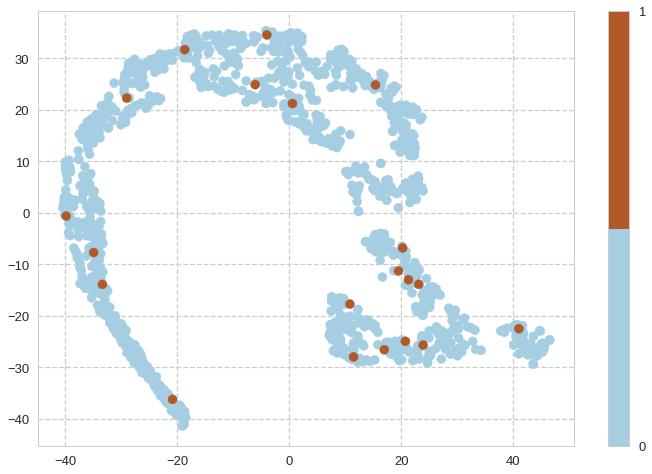

In [184]:
pyplot.figure(figsize=(12,8))
pyplot.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=pyplot.cm.get_cmap("Paired", 2))
pyplot.colorbar(ticks=range(2))

In [0]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor ## Only available with scikit-learn 0.19 and later
from sklearn.cluster import KMeans

In [0]:
Y_true=df_IF['Repeat_flag']
df_IF=df_IF.drop('Repeat_flag',1)

In [0]:
# just not loose the old training data created I am creating X_trainOut, X_testOut, y_trainOut, y_testOut signifying outlier detection
X_trainOut, X_testOut, y_trainOut, y_testOut = train_test_split(df_IF, Y_true, test_size=0.3, random_state=42)

In [0]:
## Not required for Isolation Forest
## we are doing a MIN MAX SCALING on the data
def preprocess(df_IF):
    for col in df_IF:
        df_IF[col]=(df_IF[col]-np.min(df_IF[col]))/(np.max(df_IF[col])-np.min(df_IF[col]))
    return

The below train and predict functions are designed to output ensemble models (bagged models), with the default size being 5 models. The Isolation Forest and One Class SVM use these functions.

In [0]:
## Not valid for LOF
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_IF.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

In [0]:
## Not valif for LOF
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

## Isolation forest

In [0]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.02, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [192]:
%%timeit
if_mdlLst=train(X_trainOut,alg)

1 loop, best of 3: 3.74 s per loop


In [0]:
if_mdlLst=train(X_trainOut,alg)

In [196]:
%%timeit
if_y_pred=predict(X_testOut,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

1 loop, best of 3: 1.87 s per loop


In [0]:
if_y_pred=predict(X_testOut,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

In [224]:
roc_auc_score(y_testOut, if_y_pred_class)

0.5122522344249859

In [225]:
f1_score(y_testOut, if_y_pred_class)

0.03977272727272727

In [0]:
if_cm=confusion_matrix(y_testOut, if_y_pred_class)

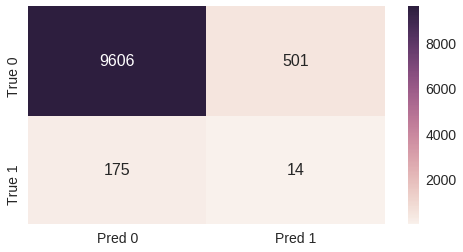

In [227]:
import seaborn as sn
     
df_cm = pd.DataFrame(if_cm,
                  ['True 0','True 1'],['Pred 0','Pred 1'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

## The below techniques are all unsupervised and hence will be directly used on Test data

## KMeans

In [0]:
kmeans = KMeans(n_clusters=8, random_state=42,n_jobs=-1).fit(X_trainOut)

In [0]:
X_test_clusters=kmeans.predict(X_testOut)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_testOut.values,X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

In [207]:
roc_auc_score(y_testOut, km_y_pred)

0.5041673144967891

In [208]:
f1_score(y_testOut, km_y_pred)

0.03125

In [0]:
km_cm=confusion_matrix(y_testOut, km_y_pred)

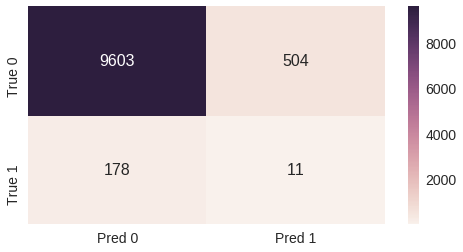

In [210]:
df_cm = pd.DataFrame(km_cm,
                  ['True 0','True 1'],['Pred 0','Pred 1'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

## Local Outlier Factor

In [0]:
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, \
                   metric='minkowski', p=2, metric_params=None, contamination=0.2, n_jobs=-1)

In [229]:
clf.fit(X_testOut)

LocalOutlierFactor(algorithm='auto', contamination=0.2, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=-1,
          n_neighbors=20, p=2)

In [0]:
lof_y_pred=clf.negative_outlier_factor_

#Creating class labels based on decision function
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

In [232]:
roc_auc_score(y_testOut, lof_y_pred_class)

0.4906924479497943

In [0]:
lof_cm=confusion_matrix(y_testOut, lof_y_pred_class)

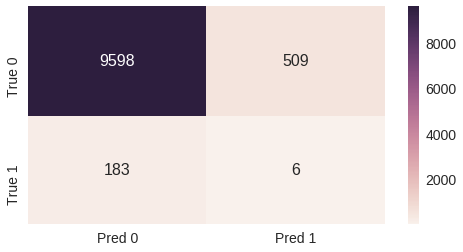

In [234]:
df_cm = pd.DataFrame(lof_cm,
                  ['True 0','True 1'],['Pred 0','Pred 1'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

## One - class SVM

In [0]:
alg=OneClassSVM(kernel='linear',gamma='auto', coef0=0.0, tol=0.001, nu=0.5, \
                shrinking=True, cache_size=500, verbose=False, max_iter=-1)

In [0]:
osvm_mdlLst=train(X_trainOut,alg)

In [0]:
osvm_y_pred=predict(X_testOut,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

In [238]:
roc_auc_score(y_testOut, osvm_y_pred_class)

0.5530207729673446

In [239]:
f1_score(y_testOut, osvm_y_pred_class)

0.04273504273504274

In [0]:
osvm_cm=confusion_matrix(y_testOut, osvm_y_pred_class)

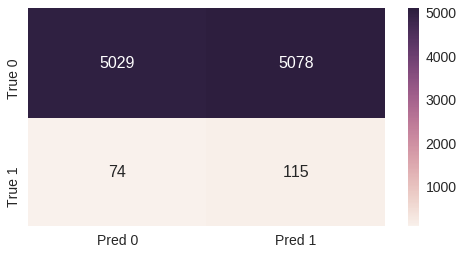

In [241]:
df_cm = pd.DataFrame(osvm_cm,
                  ['True 0','True 1'],['Pred 0','Pred 1'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

## Performance Comparison OF Outlier detection Mechanism

In [0]:
## Performance Plot
auc_scores={
    'Isolation Forest': roc_auc_score(y_testOut, if_y_pred_class),
    'KMeans':roc_auc_score(y_testOut, km_y_pred),
    'LOF':roc_auc_score(y_testOut, lof_y_pred_class),
    'OneClass SVM': roc_auc_score(y_testOut, osvm_y_pred_class)
}

f1_scores={
    'Isolation Forest':f1_score(y_testOut, if_y_pred_class),
    'KMeans':f1_score(y_testOut, km_y_pred),
    'LOF':f1_score(y_testOut, lof_y_pred_class),
    'OneClass SVM': f1_score(y_testOut, osvm_y_pred_class)
}

Text(0.5,0,'AUC Score')

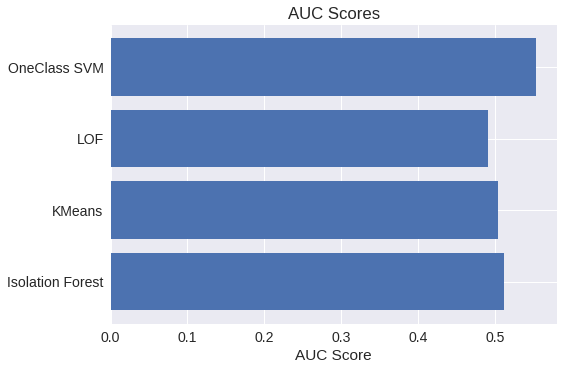

In [243]:
pyplot.title('AUC Scores')
pyplot.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
pyplot.yticks(range(len(auc_scores)), list(auc_scores.keys()))
pyplot.xlabel('AUC Score')

Text(0.5,0,'F1 Score')

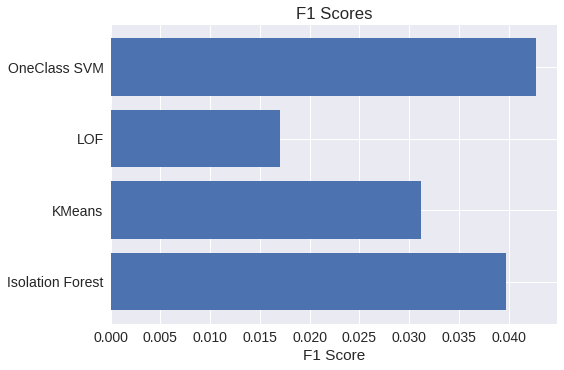

In [245]:
pyplot.title('F1 Scores')
pyplot.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
pyplot.yticks(range(len(f1_scores)), list(f1_scores.keys()))
pyplot.xlabel('F1 Score')

## FEATURE SELECTION

### CHEKING NUMBER OF NEUMERICAL AND CATEGORICAL FEATURES IN ORNIGINAL DATASET

In [19]:
categorical_list = []
numerical_list = []
data = propensity
for i in data.columns.tolist():
    if data[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 4
Number of numerical features: 12


In [20]:
df_num.head(1)

b_CONTACTID  b_resnumber  Repeat_flag  Tenure_Months  \
0      2622933        45489            0      22.233333   

   Frequency_of_travel_till_july  last_booking_month  Time_since_last_booking  \
0                              1                   1                      575   

   Age_derived  NOPAX  Days_advance_booking  REVENUE  NUMDAYS  
0         46.0      1                   215  3686.55     15.0

In [0]:
# first ten features
X=df_num.iloc[:,3:11]
#X.drop('Repeat_flag', axis=1, inplace=True)
num_feature_training=9
Y=df_num.iloc[:,2]


In [0]:
import seaborn as sns
plt.style.use('bmh')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

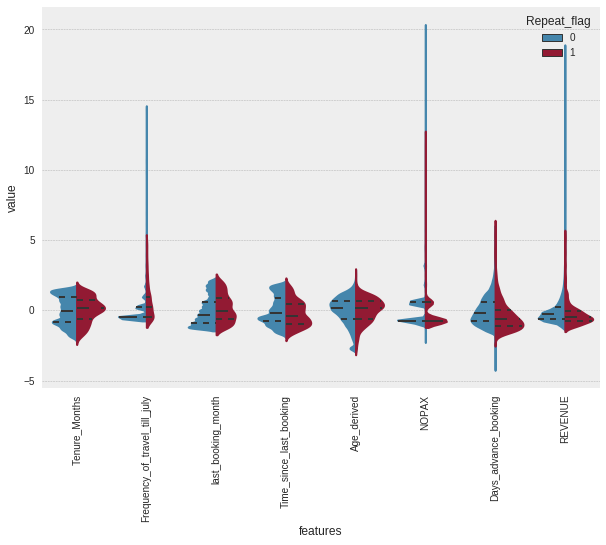

In [24]:
data_dia = Y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2.iloc[:,0:9]],axis=1) # Mrging both X and Y to get data 
data = pd.melt(data,id_vars="Repeat_flag",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,7))
sns.violinplot(x="features", y="value", hue="Repeat_flag", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

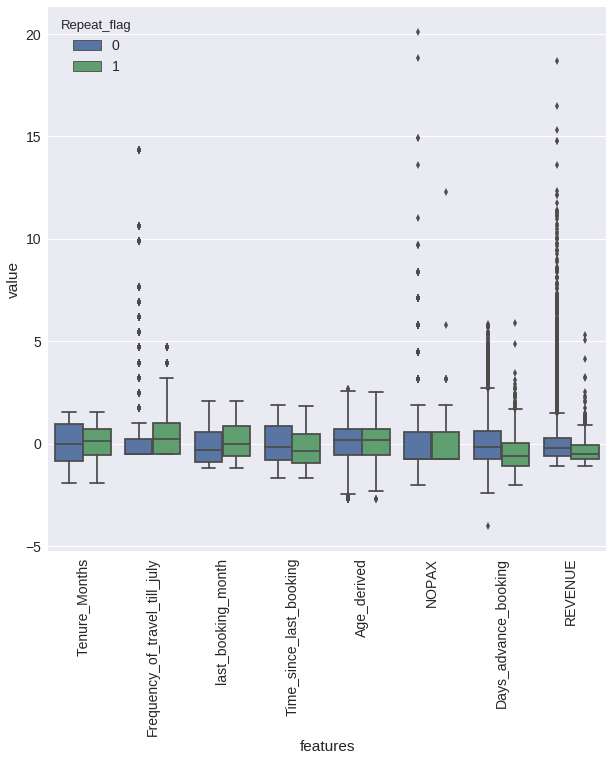

In [260]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Repeat_flag", data=data)
plt.xticks(rotation=90)

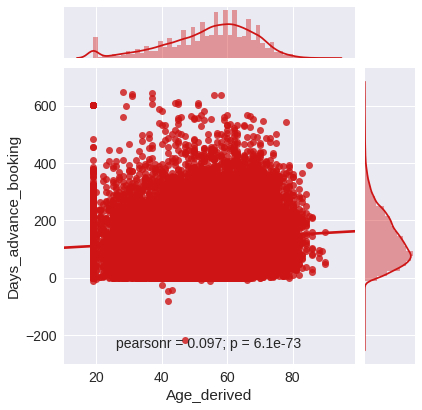

In [262]:
sns.jointplot(X.loc[:,'Age_derived'], X.loc[:,'Days_advance_booking'], kind="regg", color="#ce1414")

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


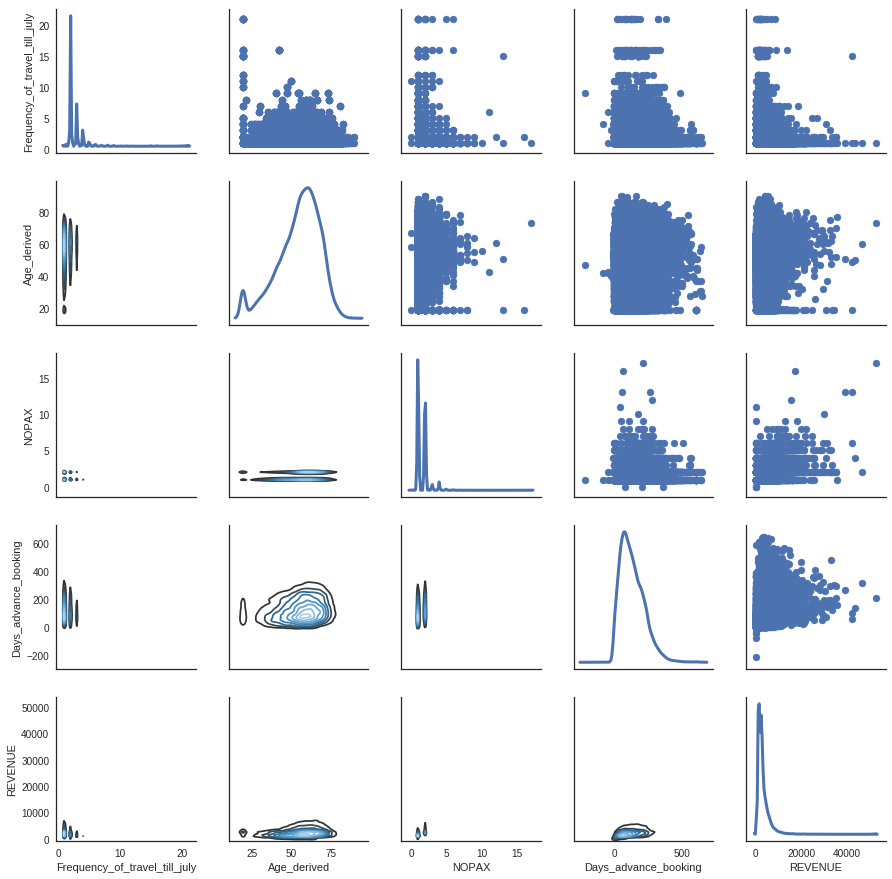

In [263]:
sns.set(style="white")
df = X.loc[:,['Frequency_of_travel_till_july','Age_derived','NOPAX','Days_advance_booking','REVENUE']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

## Tree based feature selection

Feature ranking:
1. feature 7 (0.206664)
2. feature 6 (0.188759)
3. feature 3 (0.169211)
4. feature 0 (0.163410)
5. feature 4 (0.147992)
6. feature 2 (0.059103)
7. feature 1 (0.051031)
8. feature 5 (0.013830)


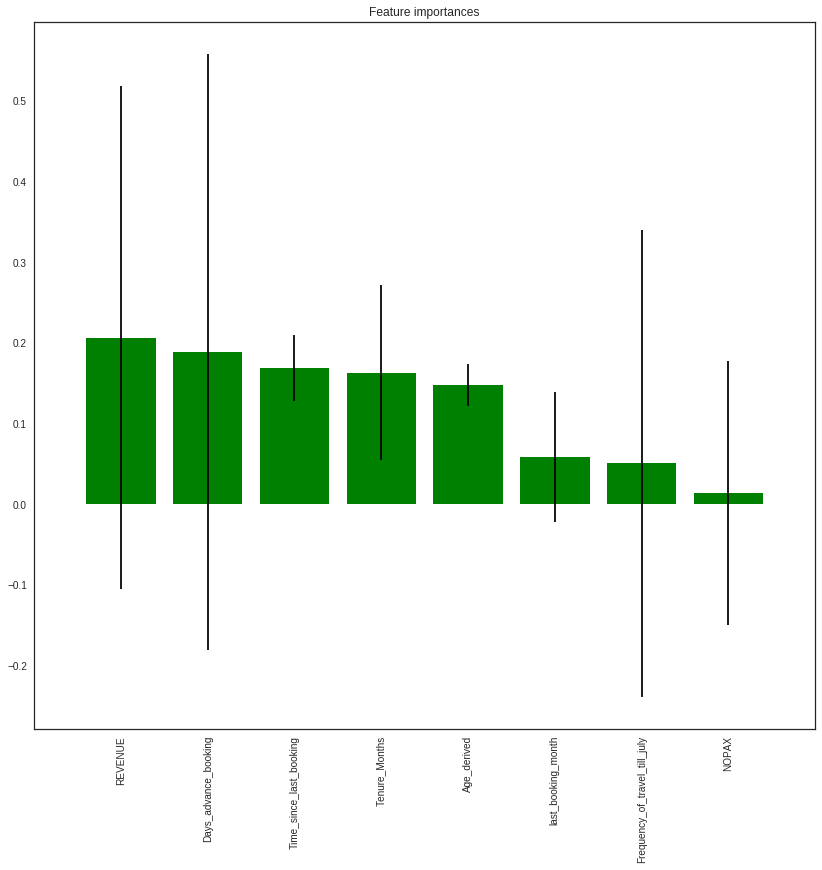

In [266]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,Y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

 ### Recursive feature elimination with cross validation and random forest classification

In [267]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, Y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 1
Best features : Index(['REVENUE'], dtype='object')


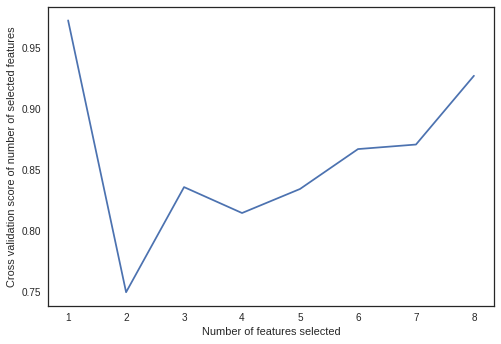

In [268]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Correlation analysis for feature selection

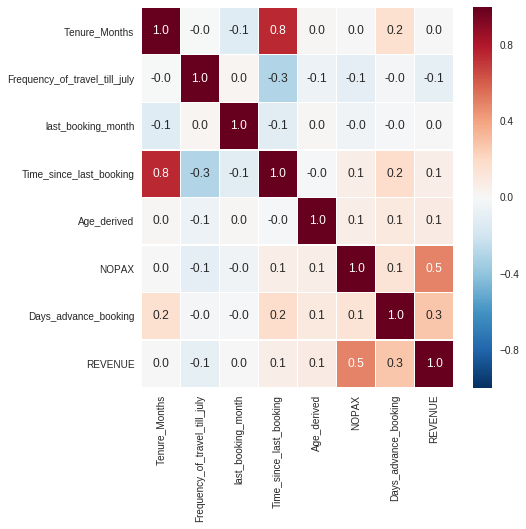

In [270]:
#correlation map
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### PAIRPLOT - BI-VARIATE ANALYSIS FEATURE SELECTION

In [28]:
pair = pd.concat([X, Y], axis=1) 
pair.head(1)

Tenure_Months  Frequency_of_travel_till_july  last_booking_month  \
0      22.233333                              1                   1   

   Time_since_last_booking  Age_derived  NOPAX  Days_advance_booking  REVENUE  \
0                      575         46.0      1                   215  3686.55   

   Repeat_flag  
0            0

In [0]:
#sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='afmhot',size=1.4)

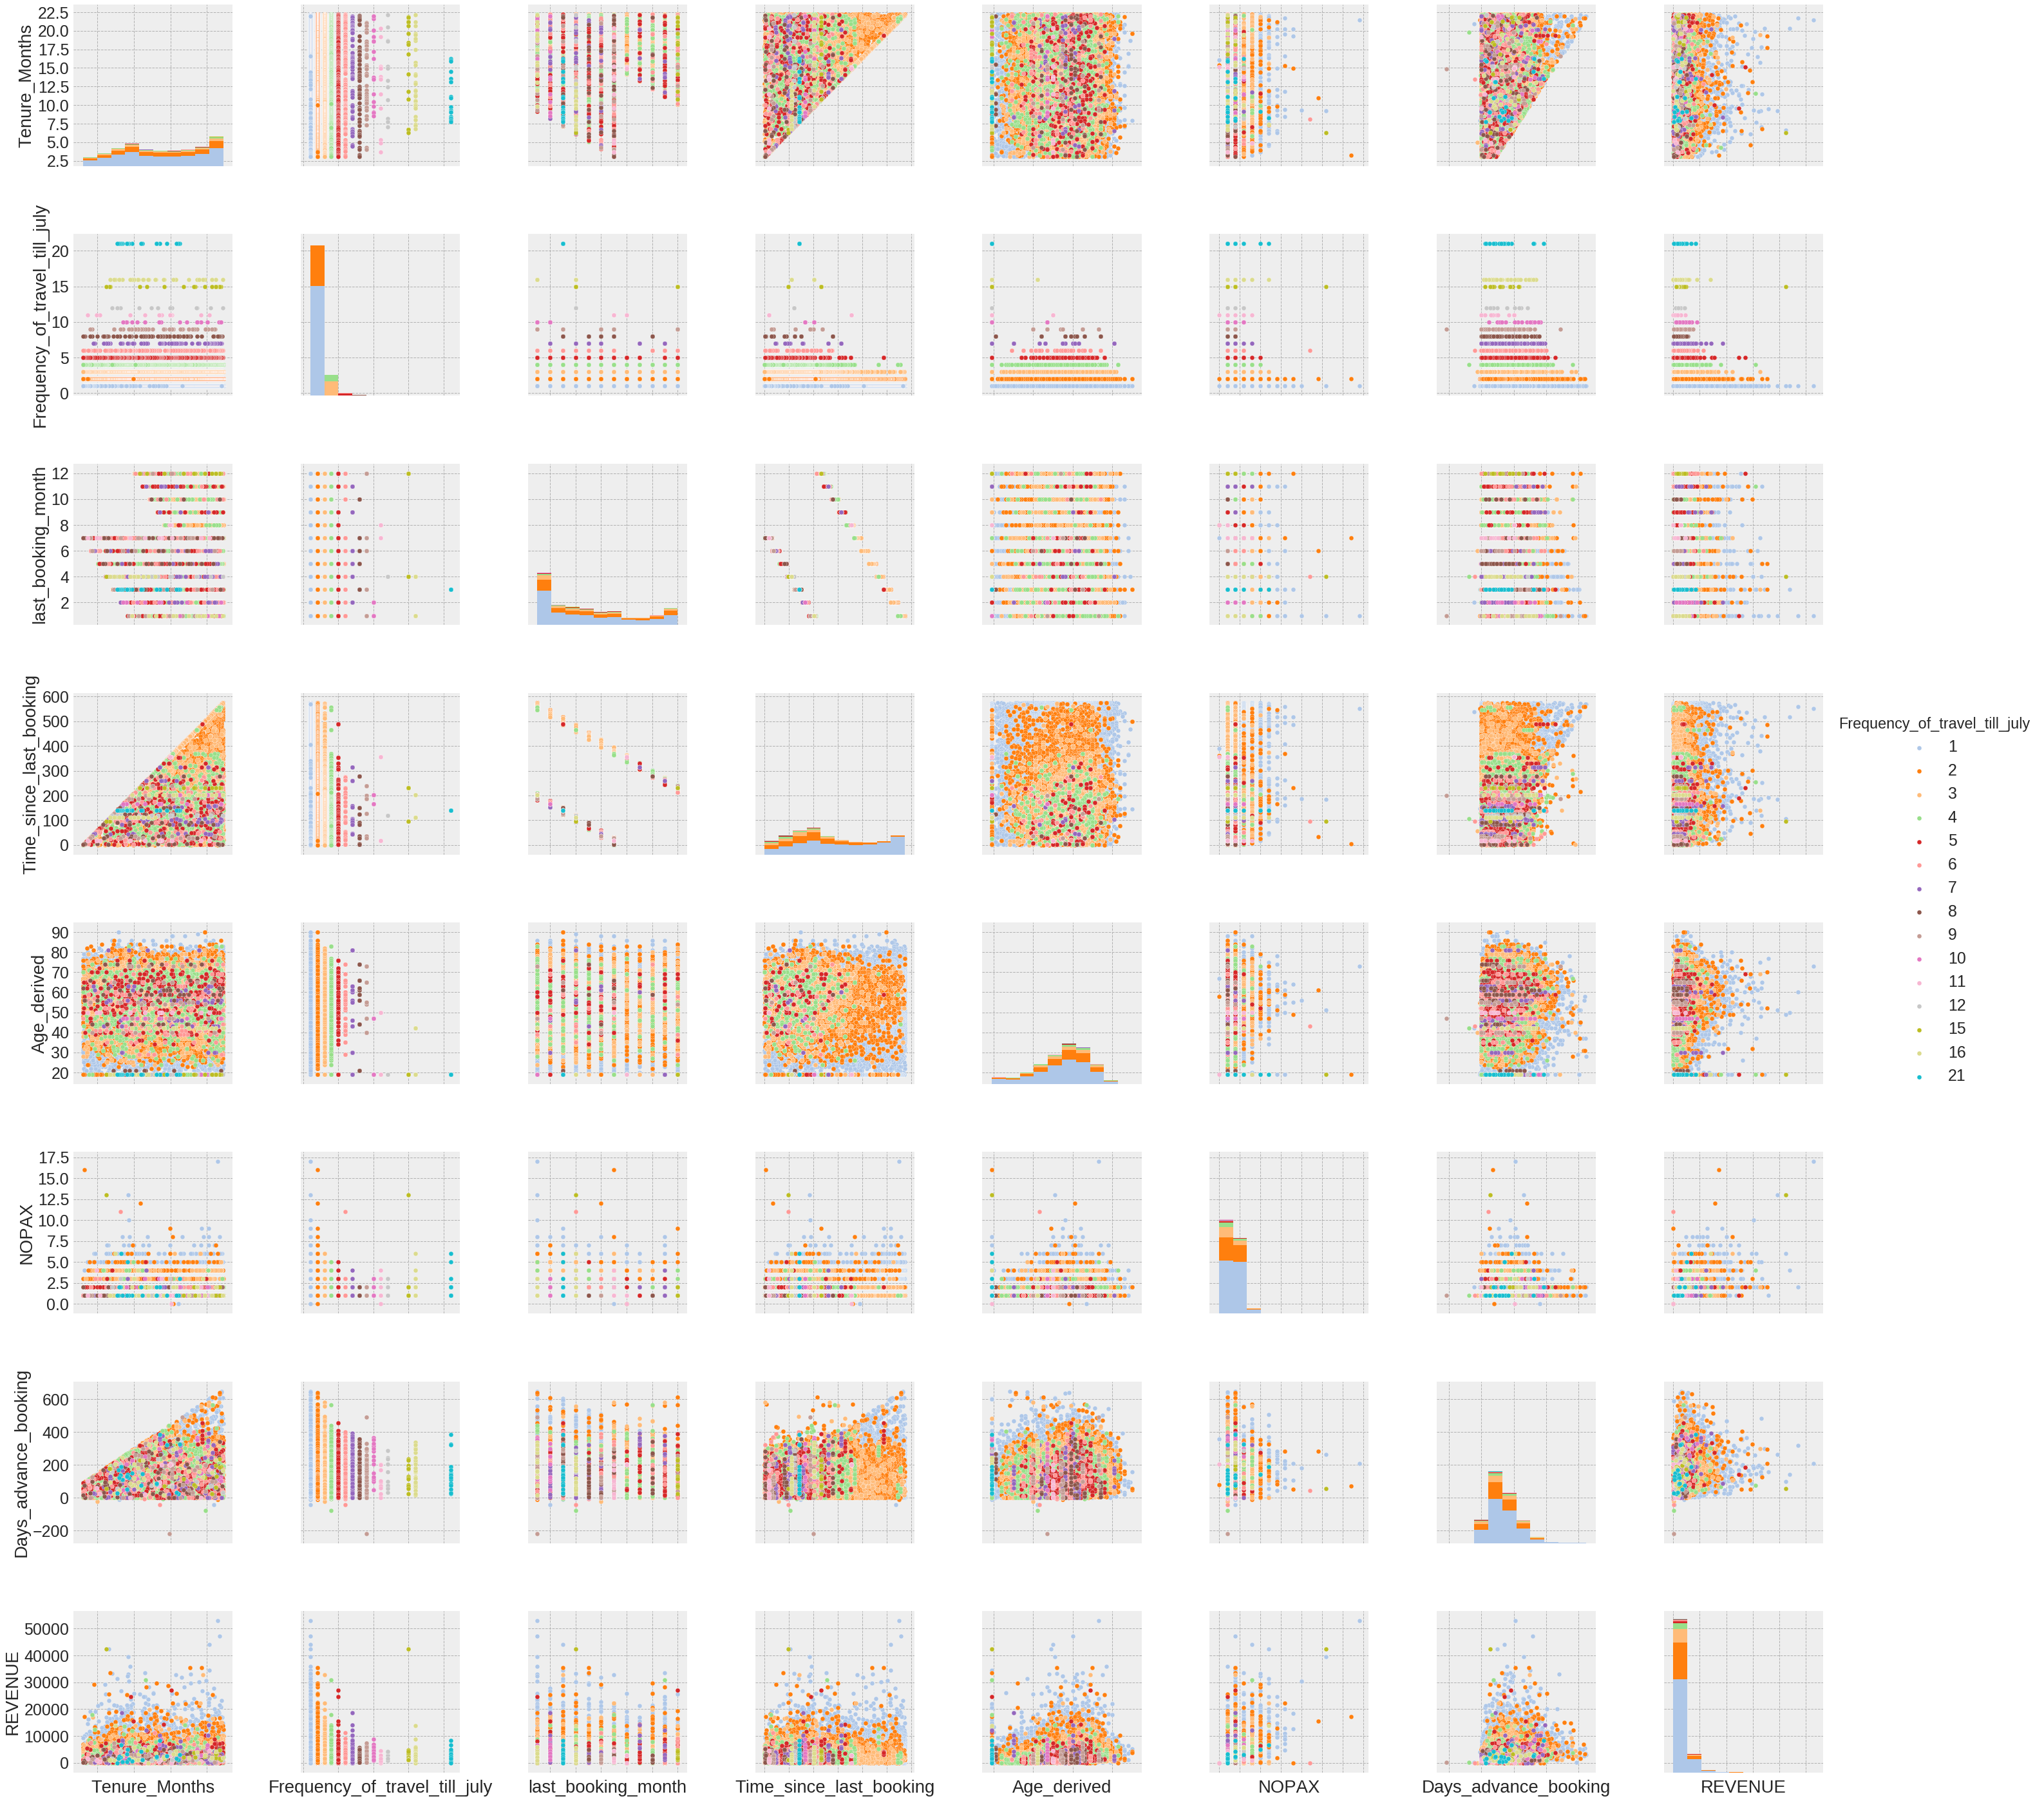

In [33]:

with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(X[['Tenure_Months','Frequency_of_travel_till_july','last_booking_month','Time_since_last_booking','Age_derived','NOPAX','Days_advance_booking','REVENUE']], 
                 hue='Frequency_of_travel_till_july', palette='tab20',size=5)
g.set(xticklabels=[]);

### Univariate feature selection Chi-Square test

In [272]:
X.describe()

Tenure_Months  Frequency_of_travel_till_july  last_booking_month  \
count   34319.000000                   34319.000000        34319.000000   
mean       13.741213                       1.674204            5.052624   
std         5.494377                       1.348982            3.360652   
min         3.066667                       1.000000            1.000000   
25%         9.066667                       1.000000            2.000000   
50%        13.700000                       1.000000            4.000000   
75%        18.933333                       2.000000            7.000000   
max        22.233333                      21.000000           12.000000   

       Time_since_last_booking   Age_derived         NOPAX  \
count             34319.000000  34319.000000  34319.000000   
mean                271.549812     54.735476      1.563303   
std                 162.225959     13.250298      0.767671   
min                   0.000000     19.000000      0.000000   
25%                 143.000000     47.000000      1.000000   
50%                 242.000000     57.000000      1.000000   
75%                 407.000000     64.000000      2.000000   
max                 575.000000     90.000000     17.000000   

       Days_advance_booking       REVENUE  
count          34319.000000  34319.000000  
mean             133.936915   2988.448696  
std               87.576984   2678.551041  
min             -218.000000      0.000000  
25%               67.000000   1388.075000  
50%              119.000000   2339.100000  
75%              188.000000   3631.940000  
max              649.000000  52970.240500

In [0]:
# Incase we want to have differenbt of treatment 
for col in df.columns:
    df[col][df[col] < 0] = 0

In [0]:
# There is some negative values. Let's floor them to 0

X[X < 0] = 0

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X.iloc[:,0:], Y)

In [279]:
print('Score list:', select_feature.scores_)
print('Feature list:', X.columns)

Score list: [3.66560918e+00 3.11967733e+02 4.57047986e+01 2.73223778e+03
 3.91914759e+00 2.62594130e+01 6.20767617e+03 1.60487420e+05]
Feature list: Index(['Tenure_Months', 'Frequency_of_travel_till_july', 'last_booking_month',
       'Time_since_last_booking', 'Age_derived', 'NOPAX',
       'Days_advance_booking', 'REVENUE'],
      dtype='object')


## ENSAMBLE FEATURE SELECTION

Setting up the data set 

In [0]:
Num_feature = 6  # Select top how many number of feature you want to select

In [0]:
#X = dataframe.drop(['SK_ID_CURR', 'TARGET'], axis=1)
#y = dataframe.TARGET

#We have muted above as we have X, Y already
feature_name = X.columns.tolist()
X[X < 0] = 0 # Removing any negative value

#### Pearson Correlation method

In [0]:
# Pearson correlation based
def cor_selector(X, Y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], Y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-Num_feature:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [39]:
cor_support, cor_feature = cor_selector(X, Y)
print(str(len(cor_feature)), 'selected features')

6 selected features


#### chi-sqare test method

In [41]:
# Chi-Square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=Num_feature)
chi_selector.fit(X_norm, Y)

SelectKBest(k=6, score_func=<function chi2 at 0x7ff23750f0d0>)

In [42]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

6 selected features


#### logistic regression based 

In [43]:
# Logistic regression based
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=Num_feature, step=10, verbose=5)
rfe_selector.fit(X_norm, Y)

Fitting estimator with 8 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=6, step=10, verbose=5)

In [44]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

6 selected features


#### Lasso regression based

In [45]:
# Embaded http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html ### 3.1 Logistics Regression L1 

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median')
embeded_lr_selector.fit(X_norm, Y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold='1.25*median')

In [46]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

4 selected features


#### Random forest based

In [47]:
# Random Forest

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X, Y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold='1.25*median')

In [48]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

1 selected features


#### Light GBM based

In [50]:
!pip install lightgbm

    100% |████████████████████████████████| 1.2MB 6.4MB/s 


In [51]:
# Light GBM
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, Y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=40, min_split_gain=0.01,
        n_estimators=500, n_jobs=-1, num_leaves=32, objective=None,
        random_state=None, reg_alpha=3, reg_lambda=1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
        norm_order=1, prefit=False, threshold='1.25*median')

In [52]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

1 selected features


### ENSAMBLING ALL TOGEATHER

In [53]:
# Summary

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

Chi-2                        Feature  LightGBM  Logistics  Pearson    RFE  \
1   True                        REVENUE     False       True     True   True   
2   True                          NOPAX     False       True     True   True   
3   True  Frequency_of_travel_till_july     False       True     True   True   
4   True           Days_advance_booking     False       True     True   True   
5   True        Time_since_last_booking      True      False     True  False   
6   True             last_booking_month     False      False     True  False   
7  False                  Tenure_Months     False      False    False   True   
8  False                    Age_derived     False      False    False   True   

   Random Forest  Total  
1           True      5  
2          False      4  
3          False      4  
4          False      4  
5          False      3  
6          False      2  
7          False      1  
8          False      1

### MUTUAL INFORMATION - FEATURE SELECTION

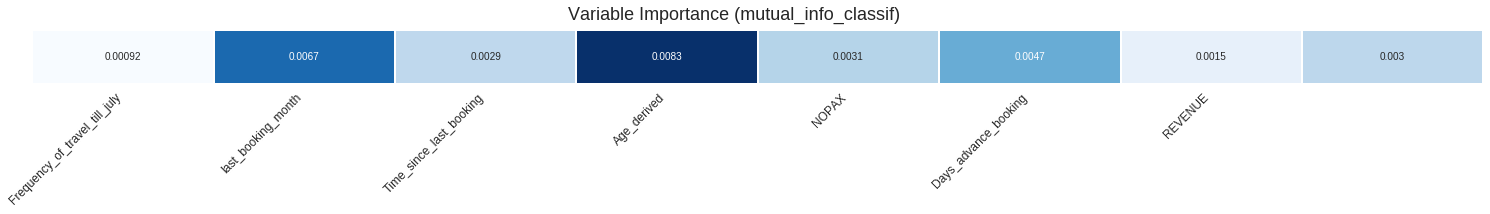

In [54]:
from sklearn.feature_selection import mutual_info_classif
kepler_mutual_information = mutual_info_classif(X, Y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X.columns[1:], rotation=45, ha='right', fontsize=12)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass

In [0]:
from sklearn.feature_selection import GenericUnivariateSelect
mutual_info = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=50)
X_trans = mutual_info.fit_transform(X, Y)

In [57]:
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, X_trans.shape[1]))

We started with 7 features but retained only 4 of them!


In [61]:
mutual_info_support = mutual_info.get_support()
mutual_info_feature = X.loc[:,mutual_info_support].columns.tolist()
print(str(len(mutual_info_feature)), 'selected features')

4 selected features


In [62]:
# Summary

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support, 'MutualInformation':mutual_info_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

Chi-2                        Feature  LightGBM  Logistics  \
1   True                        REVENUE     False       True   
2   True                          NOPAX     False       True   
3   True  Frequency_of_travel_till_july     False       True   
4   True        Time_since_last_booking      True      False   
5   True           Days_advance_booking     False       True   
6   True             last_booking_month     False      False   
7  False                  Tenure_Months     False      False   
8  False                    Age_derived     False      False   

   MutualInformation  Pearson    RFE  Random Forest  Total  
1               True     True   True           True      6  
2               True     True   True          False      5  
3               True     True   True          False      5  
4               True     True  False          False      4  
5              False     True   True          False      4  
6              False     True  False          False      2  
7              False    False   True          False      1  
8              False    False   True          False      1

## FEATURE Engineering -

# PCA

Text(0,0.5,'explained_variance_ratio_')

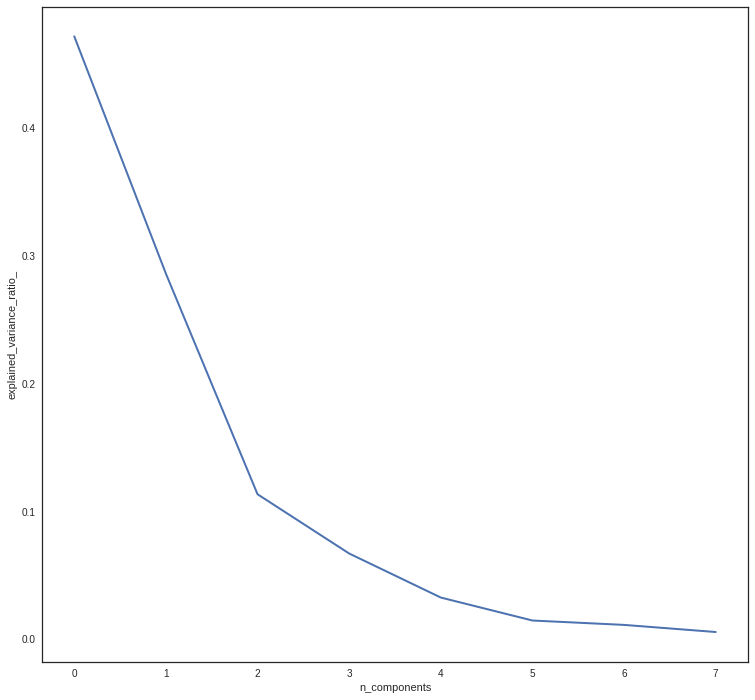

In [281]:

#Muting the below train test split as we have already done that in the begining

#x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
x_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

## DUMMY VARIABLE CREATION

In [0]:
# Deal with Categorical features: OneHotEncoding
from sklearn.preprocessing import Imputer

del data_frame; gc.collect()
data_frame = pd.get_dummies(data_frame, drop_first=True)
print(data_frame.shape)

In [0]:
Dir(prince)

['CA', 'MCA', 'PCA', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'ca', 'mca', 'pca', 'plot', 'svd

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## FACTOR ANALYSIS

[https://factor-analyzer.readthedocs.io/en/latest/genindex.html]

[https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.calculate_bartlett_sphericity]

In [63]:
!pip install factor_analyzer

In [64]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
df_features = X
fa = FactorAnalyzer()
fa.analyze(df_features, 3, rotation=None)
fa.loadings


Factor1   Factor2   Factor3
Tenure_Months                  0.735886 -0.370896  0.279334
Frequency_of_travel_till_july -0.441257 -0.210105  0.869866
last_booking_month            -0.119300  0.041677 -0.030513
Time_since_last_booking        0.877731 -0.277439  0.031652
Age_derived                    0.050500  0.105032 -0.006365
NOPAX                          0.212819  0.471101  0.104535
Days_advance_booking           0.258823  0.181789  0.146192
REVENUE                        0.329659  0.837537  0.264187

In [71]:
fa.fit_factor_analysis(X, 3, use_smc=True, bounds=(0.005, 1), method='ml')

Factor1   Factor2   Factor3
Tenure_Months                 -0.012860 -0.376420  0.771215
Frequency_of_travel_till_july  0.997424 -0.009570  0.007325
last_booking_month             0.018560  0.055481 -0.114682
Time_since_last_booking       -0.312849 -0.412094  0.775334
Age_derived                   -0.058211 -0.067258 -0.054224
NOPAX                         -0.103421 -0.468765 -0.213911
Days_advance_booking          -0.026062 -0.344056  0.044567
REVENUE                       -0.097967 -0.850535 -0.407507

In [0]:
###### SYNTAX

fa.analyze(data, n_factors=3, rotation='promax', method='minres', use_smc=True, bounds=(0.005, 1), normalize=True, impute='median', **kwargs)

Fit the factor analysis model using either minres or ml solutions. By default, use SMC as starting guesses and perform Kaiser normalization.

### Parameters:	
*  data (pd.DataFrame) – The data to analyze.
*  n_factors (int, optional) – The number of factors to select. Defaults to 3.
*  rotation (str, optional) –
The type of rotation to perform after fitting the factor analysis model. If set to None, no rotation will be performed, nor will any associated Kaiser normalization.

### Methods include:

*  varimax (orthogonal rotation)
*  promax (oblique rotation)
*  oblimin (oblique rotation)
*  oblimax (orthogonal rotation)
*  quartimin (oblique rotation)
*  quartimax (orthogonal rotation)
*  equamax (orthogonal rotation)

### Defaults to ‘promax’.

*  method ({'minres', 'ml'}, optional) – The fitting method to use, either MINRES or Maximum Likelihood. Defaults to ‘minres’.
*  use_smc (bool, optional) – Whether to use squared multiple correlation as starting guesses for factor analysis. Defaults to True.
*  bounds (tuple, optional) – The lower and upper bounds on the variables for “L-BFGS-B” optimization. Defaults to (0.005, 1).
*  normalize (bool, optional) – Whether to perform Kaiser normalization and de-normalization prior to and following rotation. Defaults to True.
*  impute ({'drop', 'mean', 'median'}, optional) – If missing values are present in the data, either use list-wise deletion (‘drop’) or impute the column median (‘median’) or column mean (‘mean’). Defaults to ‘median’.
*  optional (kwargs,) – Additional key word arguments are passed to the rotation method.

#### Raises:	
*  ValueError – If rotation not None or in POSSIBLE_ROTATIONS.
*  ValueError – If missing values present and missing_values is not set to either ‘drop’ or ‘impute’.

#### Notes

varimax is an orthogonal rotation, while promax is an oblique rotation. For more details on promax rotations, see here:

References

[1] https://www.rdocumentation.org/packages/psych/versions/1.7.8/topics/Promax

In [65]:
ev, v = fa.get_eigenvalues()
ev

Original_Eigenvalues
0              1.997723
1              1.562887
2              1.023672
3              1.010788
4              0.956370
5              0.785826
6              0.478794
7              0.183940

In [66]:
fa.get_factor_variance()

Factor1   Factor2   Factor3
SS Loadings     1.744388  1.227901  0.938762
Proportion Var  0.218049  0.153488  0.117345
Cumulative Var  0.218049  0.371536  0.488881

In [67]:
# Get the factor scores, given the data.

fa.analyze(df_features, 3, rotation='varimax')
fa.get_scores(df_features).head()

Factor1   Factor2   Factor3
0  1.740947  0.204494 -0.330423
1  1.772199 -0.261619 -0.390861
2  1.735940 -0.671943 -0.430489
3  1.741853 -0.190501 -0.385076
4  0.521340  0.295155  1.825437

In [68]:
fa.get_uniqueness()

Uniqueness
Tenure_Months                    0.242880
Frequency_of_travel_till_july    0.004481
last_booking_month               0.983100
Time_since_last_booking          0.151613
Age_derived                      0.986377
NOPAX                            0.721844
Days_advance_booking             0.878591
REVENUE                          0.120063

In [69]:
#remove_non_numeric(data)

FactorAnalyzer.smc(df_features) #Calculate the squared multiple correlations. This is equivalent to regressing each variable on all others and calculating the r-squared values.

SMC
Tenure_Months                  0.632318
Frequency_of_travel_till_july  0.220928
last_booking_month             0.018261
Time_since_last_booking        0.668948
Age_derived                    0.021616
NOPAX                          0.252134
Days_advance_booking           0.115779
REVENUE                        0.294365

### Corospondance analysis- using Price package

In [72]:
!pip install prince

    100% |████████████████████████████████| 5.4MB 5.1MB/s 
    100% |████████████████████████████████| 8.9MB 2.7MB/s 
    100% |████████████████████████████████| 12.9MB 2.7MB/s 
    100% |████████████████████████████████| 952kB 18.8MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2


In [0]:
import prince

In [0]:
?prince.ca

In [0]:

import matplotlib.pyplot as plt
import pandas as pd

import prince
pca=prince.PCA(df_features, n_components=4)



In [81]:
fig2, ax2 = pca.plot_rows(color_by='class', ellipse_fill=True)
fig3, ax3 = pca.plot_correlation_circle()
fig2.savefig('pca_row_principal_coordinates.png', bbox_inches='tight', pad_inches=0.5)
fig3.savefig('pca_correlation_circle.png', bbox_inches='tight', pad_inches=0.5)

AttributeError: ignored